**LAB 3 Juan Jose Moreno Guerra 160003726**


**5.1**



> Librerias:



In [1]:
%matplotlib inline

!pip install simpy

import simpy #Importar simpy

import numpy as np
import math
import matplotlib.pyplot as plt
import time
import random
from scipy import integrate
import scipy.stats as stats
import pandas as pd

Variables globales

In [2]:
Xant1 = 434287492
Xant2 = 514324426

M = 99999.0
T = 40.0
at = []
an = []
LLt = []
St = []

Definicion de funciones

In [3]:
def gencongru1():
    global Xant1
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 1140671485
    c = 12820163
    m = 2**24
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarXA():
    vlambda = 5
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarYA():
    vlambda = 3
    U = gencongru2()
    Y = -(math.log(1-U))/float(vlambda)
    return Y

def LlegadaA(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)

    NLL = NLL + 1
    LL.append(t)

    X = GenerarXA()

    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarYA()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y
        Serv.append(Y)

def ServidorA(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1

    St.append(t)
    at.append(t)
    an.append(n)

    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarYA()
        TSuc['tS'] = t + Y
        Serv.append(Y)

def GenerarXB():
    vlambda = 1
    U = gencongru1()
    X = -(math.log(1-U))/float(vlambda)
    return X

def GenerarYB():
    mu = 2
    sigma = 1
    Y = np.random.normal(mu, sigma)
    if Y < 0:
        Y = 0
    return Y

def LlegadaB(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)

    NLL = NLL + 1
    LL.append(t)

    X = GenerarXB()

    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarYB()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y
        Serv.append(Y)

def ServidorB(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1

    St.append(t)
    at.append(t)
    an.append(n)

    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarYB()
        TSuc['tS'] = t + Y
        Serv.append(Y)

In [4]:
def run_scenario_A():
    global n, NLL, NS, t, S, Serv, LL, at, an, TSuc
    t = tsuc = NLL = NS = n = 0
    at.append(t)
    an.append(n)

    TSuc = {"tLL": M, "tS": M}

    LL = []
    S = []
    Serv = []
    LL.append(0.0)
    S.append(0.0)
    Serv.append(0.0)
    X = GenerarXA()

    if X > T:
        Tp = t_med_sistema = t_med_cola = 0.0
    else:
        LlegadaA(X)
        while (TSuc['tLL'] != M) or (TSuc['tS'] != M):
            if TSuc['tLL'] < TSuc['tS']:
                tsuc = TSuc['tLL']
                TSuc['tLL'] = M
                LlegadaA(tsuc)
            if TSuc['tS'] < TSuc['tLL']:
                tsuc = TSuc['tS']
                TSuc['tS'] = M
                ServidorA(tsuc)
        Tp = max(0, t - T)
        acumulo1 = acumulo2 = 0.0
        ind = 0
        while ind < NLL:
            acumulo1 = acumulo1 + S[ind] - LL[ind]
            acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
            ind = ind + 1
        t_med_sistema = acumulo1 / NLL
        t_med_cola = acumulo2 / NLL
        at.append(t)
        an.append(n)
    return t_med_sistema, t_med_cola, Tp, max(an), NLL




Guardar resultados de el escenario A y reiniciar arrays

In [5]:
num_iterations = 10
metricas=[]
metricas=run_scenario_A()
print("Tiempo medio de los clientes en el sistema: ",metricas[0])
print("Tiempo medio de los clientes en la cola: ",metricas[1])
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",metricas[2])
print("Número máximo de clientes en el sistema: ",metricas[3])
print("Total de clientes que pasaron por el sistema: ",metricas[4])
at = []
an = []
scenario_A_results = []
for i in range(num_iterations):
    scenario_A_results.append(run_scenario_A())
at = []
an = []

Tiempo medio de los clientes en el sistema:  13.993193252652684
Tiempo medio de los clientes en la cola:  13.666654165146332
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  26.662466589322506
Número máximo de clientes en el sistema:  79
Total de clientes que pasaron por el sistema:  202


Definir escenario B

In [6]:
def run_scenario_B():
    global n, NLL, NS, t, S, Serv, LL, at, an, TSuc
    t = tsuc = NLL = NS = n = 0
    at.append(t)
    an.append(n)

    TSuc = {"tLL": M, "tS": M}

    LL = []
    S = []
    Serv = []
    LL.append(0.0)
    S.append(0.0)
    Serv.append(0.0)
    X = GenerarXB()

    if X > T:
        Tp = t_med_sistema = t_med_cola = 0.0
    else:
        LlegadaB(X)
        while (TSuc['tLL'] != M) or (TSuc['tS'] != M):
            if TSuc['tLL'] < TSuc['tS']:
                tsuc = TSuc['tLL']
                TSuc['tLL'] = M
                LlegadaB(tsuc)
            if TSuc['tS'] < TSuc['tLL']:
                tsuc = TSuc['tS']
                TSuc['tS'] = M
                ServidorB(tsuc)
        Tp = max(0, t - T)
        acumulo1 = acumulo2 = 0.0
        ind = 0
        while ind < NLL:
            acumulo1 = acumulo1 + S[ind] - LL[ind]
            acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
            ind = ind + 1
        t_med_sistema = acumulo1 / NLL
        t_med_cola = acumulo2 / NLL
        at.append(t)
        an.append(n)
    return t_med_sistema, t_med_cola, Tp, max(an), NLL

Guardar datos escenario B

In [7]:
metricas=[]
metricas=run_scenario_B()
print("Tiempo medio de los clientes en el sistema: ",metricas[0])
print("Tiempo medio de los clientes en la cola: ",metricas[1])
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",metricas[2])
print("Número máximo de clientes en el sistema: ",metricas[3])
print("Total de clientes que pasaron por el sistema: ",metricas[4])
at = []
an = []
scenario_B_results = []
for i in range(num_iterations):
    scenario_B_results.append(run_scenario_B())

Tiempo medio de los clientes en el sistema:  23.615156348330775
Tiempo medio de los clientes en la cola:  21.685135450702987
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  45.950012061201505
Número máximo de clientes en el sistema:  24
Total de clientes que pasaron por el sistema:  43


Generar tabla de resultados

In [8]:
# Calcula el promedio y la desviación estándar de cada medida de rendimiento para el escenario A
scenario_A_avg = [
    sum(result[0] for result in scenario_A_results) / num_iterations,  # Tiempo medio de los clientes en el sistema
    sum(result[1] for result in scenario_A_results) / num_iterations,  # Tiempo medio de los clientes en la cola
    sum(result[2] for result in scenario_A_results) / num_iterations,  # Tiempo transcurrido desde T hasta que el último cliente abandona el sistema
    sum(result[3] for result in scenario_A_results) / num_iterations,  # Número máximo de clientes en el sistema
    sum(result[4] for result in scenario_A_results) / num_iterations   # Total de clientes que pasaron por el sistema
]

scenario_A_std = [
    (sum((result[0] - scenario_A_avg[0]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[1] - scenario_A_avg[1]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[2] - scenario_A_avg[2]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[3] - scenario_A_avg[3]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5,
    (sum((result[4] - scenario_A_avg[4]) ** 2 for result in scenario_A_results) / num_iterations) ** 0.5
]

# Calcula el promedio y la desviación estándar de cada medida de rendimiento para el escenario B
scenario_B_avg = [
    sum(result[0] for result in scenario_B_results) / num_iterations,
    sum(result[1] for result in scenario_B_results) / num_iterations,
    sum(result[2] for result in scenario_B_results) / num_iterations,
    sum(result[3] for result in scenario_B_results) / num_iterations,
    sum(result[4] for result in scenario_B_results) / num_iterations
]

scenario_B_std = [
    (sum((result[0] - scenario_B_avg[0]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[1] - scenario_B_avg[1]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[2] - scenario_B_avg[2]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[3] - scenario_B_avg[3]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5,
    (sum((result[4] - scenario_B_avg[4]) ** 2 for result in scenario_B_results) / num_iterations) ** 0.5
]

# Crear la tabla con los resultados
data = {
    'Medida de desempeño': ['Tiempo medio de los clientes en el sistema', 'Tiempo medio de los clientes en la cola',
                             'Tiempo transcurrido desde T hasta que el último cliente abandona el sistema',
                             'Número máximo de clientes en el sistema', 'Total de clientes que pasaron por el sistema'],
    'Escenario A (Promedio)': scenario_A_avg,
    'Escenario A (Desviación estándar)': scenario_A_std,
    'Escenario B (Promedio)': scenario_B_avg,
    'Escenario B (Desviación estándar)': scenario_B_std
}

df = pd.DataFrame(data)

print(df)


                                 Medida de desempeño  Escenario A (Promedio)  \
0         Tiempo medio de los clientes en el sistema               13.441128   
1            Tiempo medio de los clientes en la cola               13.104020   
2  Tiempo transcurrido desde T hasta que el últim...               26.157912   
3            Número máximo de clientes en el sistema              103.500000   
4       Total de clientes que pasaron por el sistema              193.300000   

   Escenario A (Desviación estándar)  Escenario B (Promedio)  \
0                           2.665211               22.542270   
1                           2.657748               20.623278   
2                           6.419604               44.499272   
3                           8.500000               27.000000   
4                          16.137224               42.400000   

   Escenario B (Desviación estándar)  
0                           4.691263  
1                           4.578008  
2                

**5.2**

Esceneario A

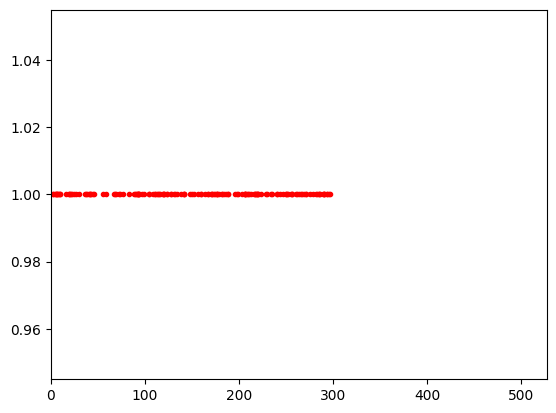

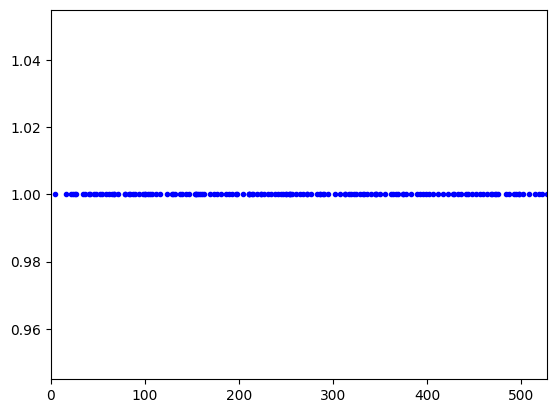

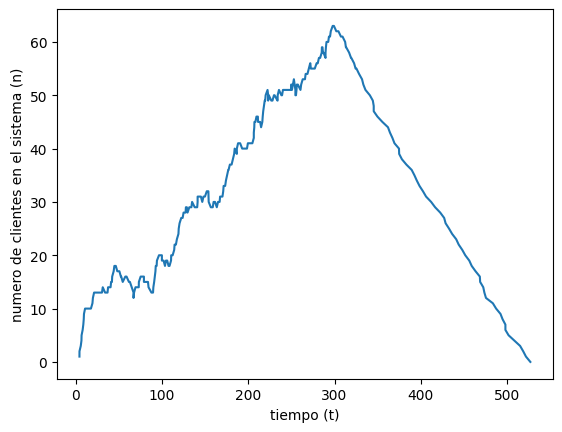

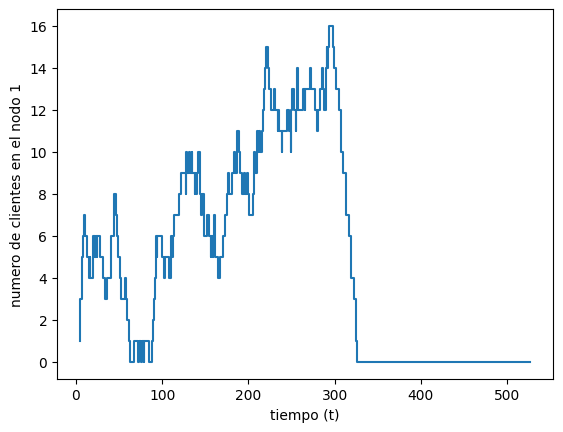

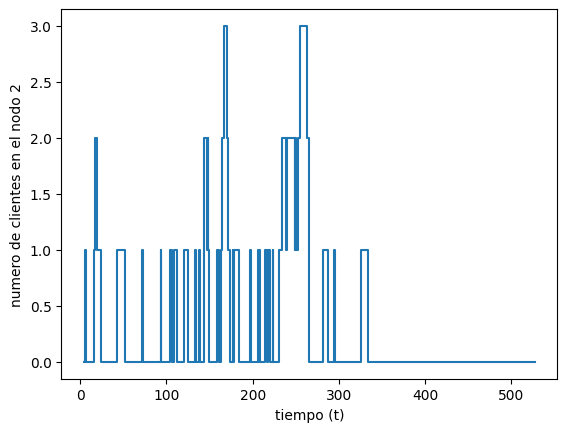

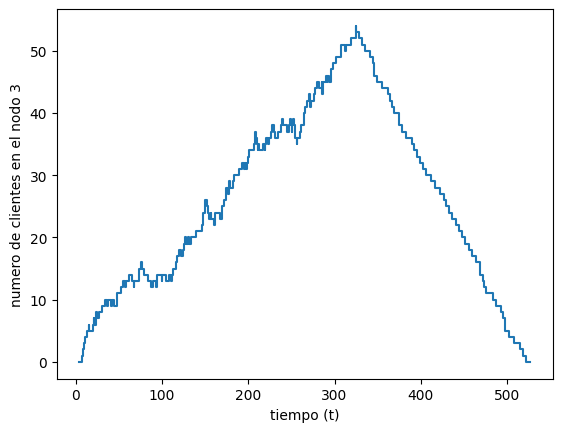

Escenario A
Tiempo medio de los clientes en el sistema:  106.1410075857892
Número promedio de clientes en el nodo 1:  3.5649506945671194
Número promedio de clientes en el nodo 2:  0.12124704632018166
Número promedio de clientes en el nodo 3:  19.31276070437215
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  227.07165427429663
Número máximo de clientes en el sistema:  63
Total de clientes que pasaron por el nodo 1:  156
Total de clientes que pasaron por el nodo 2:  59
Total de clientes que pasaron por el nodo 3:  156


In [9]:
#Escenario A

L = 2.0
mu1 = 2.1
sigma1 = 0.5
mu2 = 2.4
mu31 = 4.1
sigma31 = 2.5
mu32 = 3.0
sigma32 = 2.0


def Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc):
    n_med_n1 = n_med_n1 + n1 * (tsuc - t)
    n1 = n1 + 1

    LLt.append(tsuc)

    NLL1 = NLL1 + 1
    LL1.append(tsuc)
    t = tsuc

    Y = np.random.exponential(L)

    if (t + Y) < T:
        TSuc['tLL1'] = t + Y
    if n1 == 1:
        Y = np.random.normal(mu1, sigma1)
        if Y < 0:
            Y = 0
        TSuc['tS1'] = t + Y

    return n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc

def Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3):
    n_med_n1 = n_med_n1 + n1 * (tsuc - t)
    n1 = n1 - 1

    NS1 = NS1 + 1
    S1.append(tsuc)
    U = np.random.uniform(0, 1)
    if U <= 0.4:
        n_med_n2 = n_med_n2 + n2 * (tsuc - t)
        n2 = n2 + 1

        NLL2 = NLL2 + 1
        LL2.append(tsuc)
        if n2 == 1:
            Z = np.random.exponential(mu2)
            TSuc['tS2'] = tsuc + Z
    else:
        n_med_n3 = n_med_n3 + n3 * (tsuc - t)
        n3 = n3 + 1

        NLL3 = NLL3 + 1
        LL3.append(tsuc)
        if n3 == 1:
            W = np.random.normal(mu31, sigma31)
            if W < 0:
                W = 0
            TSuc['tS3'] = tsuc + W
    t = tsuc
    if n1 > 0:
        S = np.random.normal(mu1, sigma1) # Valores del escenario
        if S < 0:
            S = 0
        TSuc['tS1'] = tsuc + S

    return t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3

def Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3):
    n_med_n2 = n_med_n2 + n2 * (tsuc - t)
    n2 = n2 - 1

    NS2 = NS2 + 1
    S2.append(tsuc)
    if n2 > 0:
        Y = np.random.exponential(mu2) # Valores del escenario
        TSuc['tS2'] = tsuc + Y
    n_med_n3 = n_med_n3 + n3 * (tsuc - t)
    n3 = n3 + 1

    NLL3 = NLL3 + 1
    LL3.append(tsuc)
    if n3 == 1:
        W = np.random.normal(mu31, sigma31)
        if W < 0:
            W = 0
        TSuc['tS3'] = tsuc + W
    t = tsuc

    return t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3

def Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc):
    n_med_n3 = n_med_n3 + n3 * (tsuc - t)
    n3 = n3 - 1

    St.append(tsuc)

    NS3 = NS3 + 1
    S3.append(tsuc)
    if n3 > 0:
        if n3 < 5:
            R = np.random.normal(mu31, sigma31) # Valores escenario
        else:
            R = np.random.normal(mu32, sigma32) # Valores escenario
        if R < 0:
            R = 0
        TSuc['tS3'] = tsuc + R
    t = tsuc

    return t, n_med_n3, n3, St, NS3, S3, TSuc

M = 999999.0

at = []
LLt = []
St = []
an1 = []
an2 = []
an3 = []
an = []


T = 300.0

t = tsuc = Tp = 0

NLL1 = NLL2 = NLL3 = NS1 = NS2 = NS3 = n1 = n2 = n3 = 0

n_med_n1 = n_med_n2 = n_med_n3 = 0

TSuc = {"tLL1": M, "tS1": M, "tS2": M, "tS3": M}

LL1 = []
LL2 = []
LL3 = []

S1 = []
S2 = []
S3 = []

X = np.random.exponential(L)

if X > T:
    Tp = t_med_sistema = 0.0
    n_med_n1 = n_med_n2 = n_med_n3 = 0
    exit
else:
    n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(X, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
    while min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) != M:
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tLL1']:
            tsuc = TSuc['tLL1']
            TSuc['tLL1'] = M
            n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS1']:
            tsuc = TSuc['tS1']
            TSuc['tS1'] = M
            t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS2']:
            tsuc = TSuc['tS2']
            TSuc['tS2'] = M
            t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS3']:
            tsuc = TSuc['tS3']
            TSuc['tS3'] = M
            t, n_med_n3, n3, St, NS3, S3, TSuc = Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc)
        at.append(tsuc)
        an1.append(n1)
        an2.append(n2)
        an3.append(n3)
        an.append(n1 + n2 + n3)

    Tp = max(0, t - T)
    acumulo1 = acumulo2 = acumulo3 = 0.0

    ind = 0
    while ind < NLL1:
        acumulo1 = acumulo1 + S1[ind] - LL1[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL2:
        acumulo2 = acumulo2 + S2[ind] - LL2[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL3:
        acumulo3 = acumulo3 + S3[ind] - LL3[ind]
        ind = ind + 1

    t_med_sistema = (acumulo1 / NLL1) + (0.4 * acumulo2 / NLL2) + (acumulo3 / NLL3)

    n_med_n1 = n_med_n1 / t
    n_med_n2 = n_med_n2 / t
    n_med_n3 = n_med_n3 / t

    exit

at = np.array(at)
an1 = np.array(an1)
an2 = np.array(an2)
an3 = np.array(an3)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

#Graficas llegada salida y en el sistema de clientes

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

#graficas nodos

plt.step(at, an1)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 1')
plt.show()

plt.step(at, an2)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 2')
plt.show()

plt.step(at, an3)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 3')
plt.show()


print("Escenario A")
print("Tiempo medio de los clientes en el sistema: ", t_med_sistema)
print("Número promedio de clientes en el nodo 1: ", n_med_n1)
print("Número promedio de clientes en el nodo 2: ", n_med_n2)
print("Número promedio de clientes en el nodo 3: ", n_med_n3)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ", Tp)
print("Número máximo de clientes en el sistema: ", max(an))
print("Total de clientes que pasaron por el nodo 1: ", NS1)
print("Total de clientes que pasaron por el nodo 2: ", NS2)
print("Total de clientes que pasaron por el nodo 3: ", NS3)




Escenario B

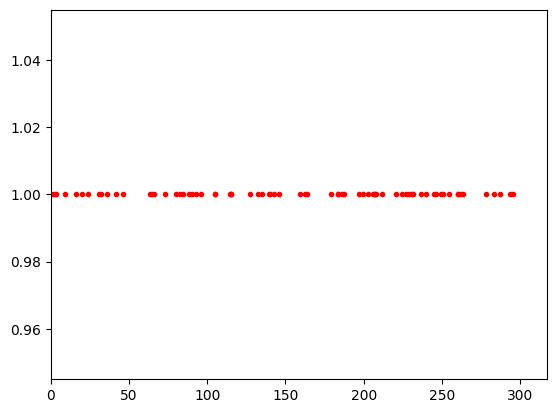

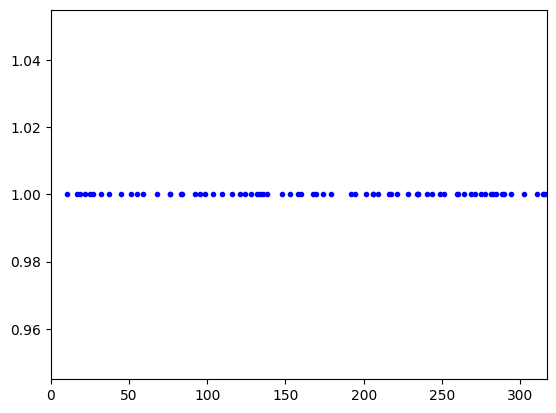

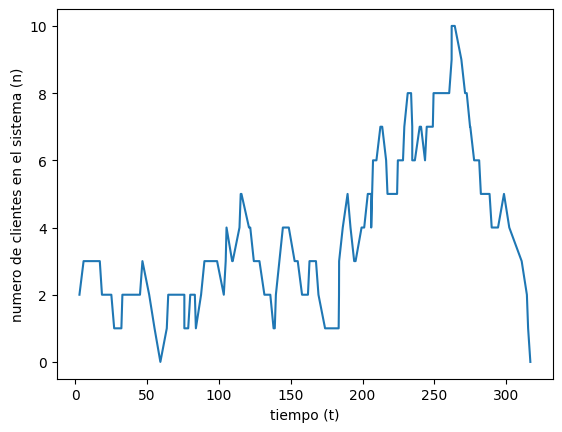

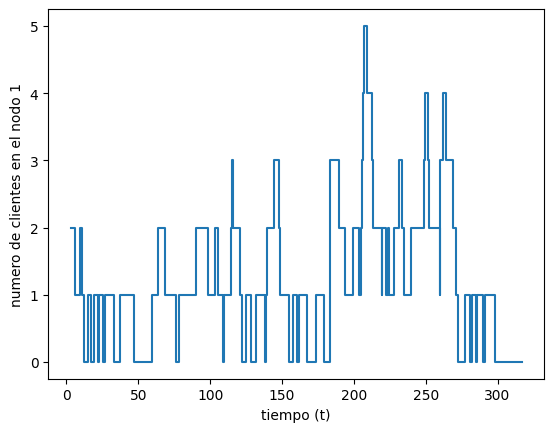

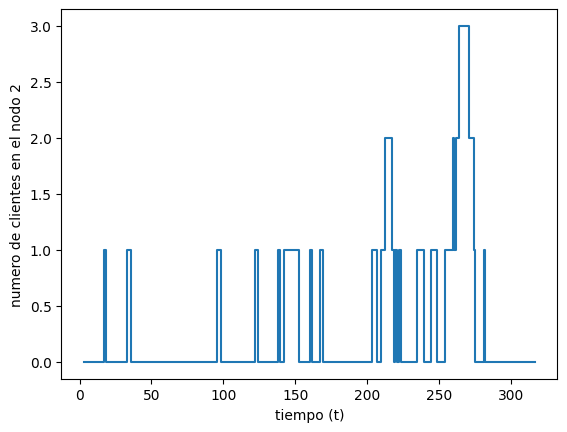

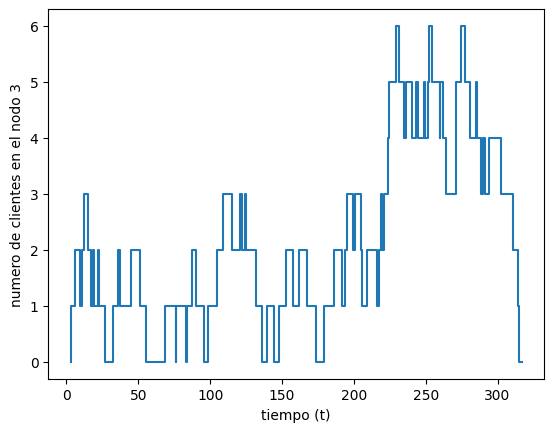

Escenario B
Tiempo medio de los clientes en el sistema:  17.27815191941061
Número promedio de clientes en el nodo 1:  0.9307706256797975
Número promedio de clientes en el nodo 2:  0.13548577281061347
Número promedio de clientes en el nodo 3:  1.4432019573338633
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  16.74894360442704
Número máximo de clientes en el sistema:  10
Total de clientes que pasaron por el nodo 1:  73
Total de clientes que pasaron por el nodo 2:  36
Total de clientes que pasaron por el nodo 3:  73


In [10]:
#Escenario B

L = 3.0
mu1 = 3.0
sigma1 = 1.0
mu2 = 1.5
mu31 = 4.0
sigma31 = 2.0
mu32 = 2.0
sigma32 = 1.5


def Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc):
    n_med_n1 = n_med_n1 + n1 * (tsuc - t)
    n1 = n1 + 1

    LLt.append(tsuc)

    NLL1 = NLL1 + 1
    LL1.append(tsuc)
    t = tsuc

    Y = np.random.exponential(L)

    if (t + Y) < T:
        TSuc['tLL1'] = t + Y
    if n1 == 1:
        Y = np.random.normal(mu1, sigma1)
        if Y < 0:
            Y = 0
        TSuc['tS1'] = t + Y

    return n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc

def Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3):
    n_med_n1 = n_med_n1 + n1 * (tsuc - t)
    n1 = n1 - 1

    NS1 = NS1 + 1
    S1.append(tsuc)
    U = np.random.uniform(0, 1)
    if U <= 0.4:
        n_med_n2 = n_med_n2 + n2 * (tsuc - t)
        n2 = n2 + 1

        NLL2 = NLL2 + 1
        LL2.append(tsuc)
        if n2 == 1:
            Z = np.random.exponential(mu2)
            TSuc['tS2'] = tsuc + Z
    else:
        n_med_n3 = n_med_n3 + n3 * (tsuc - t)
        n3 = n3 + 1

        NLL3 = NLL3 + 1
        LL3.append(tsuc)
        if n3 == 1:
            W = np.random.normal(mu31, sigma31)
            if W < 0:
                W = 0
            TSuc['tS3'] = tsuc + W
    t = tsuc
    if n1 > 0:
        S = np.random.normal(mu1, sigma1) # Valores del escenario
        if S < 0:
            S = 0
        TSuc['tS1'] = tsuc + S

    return t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3

def Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3):
    n_med_n2 = n_med_n2 + n2 * (tsuc - t)
    n2 = n2 - 1

    NS2 = NS2 + 1
    S2.append(tsuc)
    if n2 > 0:
        Y = np.random.exponential(mu2) # Valores del escenario
        TSuc['tS2'] = tsuc + Y
    n_med_n3 = n_med_n3 + n3 * (tsuc - t)
    n3 = n3 + 1

    NLL3 = NLL3 + 1
    LL3.append(tsuc)
    if n3 == 1:
        W = np.random.normal(mu31, sigma31)
        if W < 0:
            W = 0
        TSuc['tS3'] = tsuc + W
    t = tsuc

    return t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3

def Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc):
    n_med_n3 = n_med_n3 + n3 * (tsuc - t)
    n3 = n3 - 1

    St.append(tsuc)

    NS3 = NS3 + 1
    S3.append(tsuc)
    if n3 > 0:
        if n3 < 5:
            R = np.random.normal(mu31, sigma31) # Valores escenario
        else:
            R = np.random.normal(mu32, sigma32) # Valores escenario
        if R < 0:
            R = 0
        TSuc['tS3'] = tsuc + R
    t = tsuc

    return t, n_med_n3, n3, St, NS3, S3, TSuc

M = 999999.0

at = []
LLt = []
St = []
an1 = []
an2 = []
an3 = []
an = []

T = 300.0

t = tsuc = Tp = 0

NLL1 = NLL2 = NLL3 = NS1 = NS2 = NS3 = n1 = n2 = n3 = 0

n_med_n1 = n_med_n2 = n_med_n3 = 0

TSuc = {"tLL1": M, "tS1": M, "tS2": M, "tS3": M}

LL1 = []
LL2 = []
LL3 = []

S1 = []
S2 = []
S3 = []

X = np.random.exponential(L)

if X > T:
    Tp = t_med_sistema = 0.0
    n_med_n1 = n_med_n2 = n_med_n3 = 0
    exit
else:
    n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(X, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
    while min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) != M:
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tLL1']:
            tsuc = TSuc['tLL1']
            TSuc['tLL1'] = M
            n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS1']:
            tsuc = TSuc['tS1']
            TSuc['tS1'] = M
            t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS2']:
            tsuc = TSuc['tS2']
            TSuc['tS2'] = M
            t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3)
        if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS3']:
            tsuc = TSuc['tS3']
            TSuc['tS3'] = M
            t, n_med_n3, n3, St, NS3, S3, TSuc = Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc)
        at.append(tsuc)
        an1.append(n1)
        an2.append(n2)
        an3.append(n3)
        an.append(n1 + n2 + n3)

    Tp = max(0, t - T)
    acumulo1 = acumulo2 = acumulo3 = 0.0

    ind = 0
    while ind < NLL1:
        acumulo1 = acumulo1 + S1[ind] - LL1[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL2:
        acumulo2 = acumulo2 + S2[ind] - LL2[ind]
        ind = ind + 1
    ind = 0
    while ind < NLL3:
        acumulo3 = acumulo3 + S3[ind] - LL3[ind]
        ind = ind + 1

    t_med_sistema = (acumulo1 / NLL1) + (0.4 * acumulo2 / NLL2) + (acumulo3 / NLL3)

    n_med_n1 = n_med_n1 / t
    n_med_n2 = n_med_n2 / t
    n_med_n3 = n_med_n3 / t

    exit

at = np.array(at)
an1 = np.array(an1)
an2 = np.array(an2)
an3 = np.array(an3)
an = np.array(an)

LLt = np.array(LLt)
St = np.array(St)

#Graficas llegada salida y en el sistema de clientes

tmp = np.zeros((len(LLt)))+1

plt.plot(LLt, tmp, 'r.')
plt.xlim(0, max(at))
plt.show()

tmp = np.zeros((len(St)))+1

plt.plot(St, tmp, 'b.')
plt.xlim(0, max(at))
plt.show()

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

#graficas nodos

plt.step(at, an1)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 1')
plt.show()

plt.step(at, an2)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 2')
plt.show()

plt.step(at, an3)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el nodo 3')
plt.show()


print("Escenario B")
print("Tiempo medio de los clientes en el sistema: ", t_med_sistema)
print("Número promedio de clientes en el nodo 1: ", n_med_n1)
print("Número promedio de clientes en el nodo 2: ", n_med_n2)
print("Número promedio de clientes en el nodo 3: ", n_med_n3)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ", Tp)
print("Número máximo de clientes en el sistema: ", max(an))
print("Total de clientes que pasaron por el nodo 1: ", NS1)
print("Total de clientes que pasaron por el nodo 2: ", NS2)
print("Total de clientes que pasaron por el nodo 3: ", NS3)


20 iteraciones por escenario A

In [11]:
#20 runs Escenario A

tiempoMedioClientes = []
numeroPromedioClientesN1 = []
numeroPromedioClientesN2 = []
numeroPromedioClientesN3 = []
tiempoDesdeThastaClienteAbandona = []
numeroMaximoCliente = []
clientesN1 = []
clientesN2 = []
clientesN3 = []

L = 2.0
mu1 = 2.1
sigma1 = 0.5
mu2 = 2.4
mu31 = 4.1
sigma31 = 2.5
mu32 = 3.0
sigma32 = 2.0


for i in range(0,20):

  def Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc):
      n_med_n1 = n_med_n1 + n1 * (tsuc - t)
      n1 = n1 + 1

      LLt.append(tsuc)

      NLL1 = NLL1 + 1
      LL1.append(tsuc)
      t = tsuc

      Y = np.random.exponential(L)

      if (t + Y) < T:
          TSuc['tLL1'] = t + Y
      if n1 == 1:
          Y = np.random.normal(mu1, sigma1)
          if Y < 0:
              Y = 0
          TSuc['tS1'] = t + Y

      return n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc

  def Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3):
      n_med_n1 = n_med_n1 + n1 * (tsuc - t)
      n1 = n1 - 1

      NS1 = NS1 + 1
      S1.append(tsuc)
      U = np.random.uniform(0, 1)
      if U <= 0.4:
          n_med_n2 = n_med_n2 + n2 * (tsuc - t)
          n2 = n2 + 1

          NLL2 = NLL2 + 1
          LL2.append(tsuc)
          if n2 == 1:
              Z = np.random.exponential(mu2)
              TSuc['tS2'] = tsuc + Z
      else:
          n_med_n3 = n_med_n3 + n3 * (tsuc - t)
          n3 = n3 + 1

          NLL3 = NLL3 + 1
          LL3.append(tsuc)
          if n3 == 1:
              W = np.random.normal(mu31, sigma31)
              if W < 0:
                  W = 0
              TSuc['tS3'] = tsuc + W
      t = tsuc
      if n1 > 0:
          S = np.random.normal(mu1, sigma1) # Valores del escenario
          if S < 0:
              S = 0
          TSuc['tS1'] = tsuc + S

      return t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3

  def Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3):
      n_med_n2 = n_med_n2 + n2 * (tsuc - t)
      n2 = n2 - 1

      NS2 = NS2 + 1
      S2.append(tsuc)
      if n2 > 0:
          Y = np.random.exponential(mu2) # Valores del escenario
          TSuc['tS2'] = tsuc + Y
      n_med_n3 = n_med_n3 + n3 * (tsuc - t)
      n3 = n3 + 1

      NLL3 = NLL3 + 1
      LL3.append(tsuc)
      if n3 == 1:
          W = np.random.normal(mu31, sigma31)
          if W < 0:
              W = 0
          TSuc['tS3'] = tsuc + W
      t = tsuc

      return t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3

  def Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc):
      n_med_n3 = n_med_n3 + n3 * (tsuc - t)
      n3 = n3 - 1

      St.append(tsuc)

      NS3 = NS3 + 1
      S3.append(tsuc)
      if n3 > 0:
          if n3 < 5:
              R = np.random.normal(mu31, sigma31) # Valores escenario
          else:
              R = np.random.normal(mu32, sigma32) # Valores escenario
          if R < 0:
              R = 0
          TSuc['tS3'] = tsuc + R
      t = tsuc

      return t, n_med_n3, n3, St, NS3, S3, TSuc

  M = 999999.0

  at = []
  LLt = []
  St = []
  an1 = []
  an2 = []
  an3 = []
  an = []

  T = 300.0

  t = tsuc = Tp = 0

  NLL1 = NLL2 = NLL3 = NS1 = NS2 = NS3 = n1 = n2 = n3 = 0

  n_med_n1 = n_med_n2 = n_med_n3 = 0

  TSuc = {"tLL1": M, "tS1": M, "tS2": M, "tS3": M}

  LL1 = []
  LL2 = []
  LL3 = []

  S1 = []
  S2 = []
  S3 = []

  X = np.random.exponential(L)

  if X > T:
      Tp = t_med_sistema = 0.0
      n_med_n1 = n_med_n2 = n_med_n3 = 0
      exit
  else:
      n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(X, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
      while min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) != M:
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tLL1']:
              tsuc = TSuc['tLL1']
              TSuc['tLL1'] = M
              n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS1']:
              tsuc = TSuc['tS1']
              TSuc['tS1'] = M
              t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3)
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS2']:
              tsuc = TSuc['tS2']
              TSuc['tS2'] = M
              t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3)
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS3']:
              tsuc = TSuc['tS3']
              TSuc['tS3'] = M
              t, n_med_n3, n3, St, NS3, S3, TSuc = Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc)
          at.append(tsuc)
          an1.append(n1)
          an2.append(n2)
          an3.append(n3)
          an.append(n1 + n2 + n3)

      Tp = max(0, t - T)
      acumulo1 = acumulo2 = acumulo3 = 0.0

      ind = 0
      while ind < NLL1:
          acumulo1 = acumulo1 + S1[ind] - LL1[ind]
          ind = ind + 1
      ind = 0
      while ind < NLL2:
          acumulo2 = acumulo2 + S2[ind] - LL2[ind]
          ind = ind + 1
      ind = 0
      while ind < NLL3:
          acumulo3 = acumulo3 + S3[ind] - LL3[ind]
          ind = ind + 1

      t_med_sistema = (acumulo1 / NLL1) + (0.4 * acumulo2 / NLL2) + (acumulo3 / NLL3)

      n_med_n1 = n_med_n1 / t
      n_med_n2 = n_med_n2 / t
      n_med_n3 = n_med_n3 / t

      exit

  at = np.array(at)
  an1 = np.array(an1)
  an2 = np.array(an2)
  an3 = np.array(an3)
  an = np.array(an)

  LLt = np.array(LLt)
  St = np.array(St)


  tiempoMedioClientes.append(t_med_sistema)
  numeroPromedioClientesN1.append(n_med_n1)
  numeroPromedioClientesN2.append(n_med_n2)
  numeroPromedioClientesN3.append(n_med_n3)
  tiempoDesdeThastaClienteAbandona.append(Tp)
  numeroMaximoCliente.append(max(an))
  clientesN1.append(NS1)
  clientesN2.append(NS2)
  clientesN3.append(NS3)

mediaTiempoMedioClientes = np.mean(tiempoMedioClientes)
mediaNumeroPromedioClientesN1 = np.mean(numeroPromedioClientesN1)
mediaNumeroPromedioClientesN2 = np.mean(numeroPromedioClientesN2)
mediaNumeroPromedioClientesN3 = np.mean(numeroPromedioClientesN3)
mediaTiempoDesdeThastaClienteAbandona = np.mean(tiempoDesdeThastaClienteAbandona)
mediaNumeroMaximoCliente = np.mean(numeroMaximoCliente)
mediaClientesN1 = np.mean(clientesN1)
mediaClientesN2 = np.mean(clientesN2)
mediaClientesN3 = np.mean(clientesN3)

desviacionTiempoMedioClientes = np.std(tiempoMedioClientes, ddof=1)
desviacionNumeroPromedioClientesN1 = np.std(numeroPromedioClientesN1, ddof=1)
desviacionNumeroPromedioClientesN2 = np.std(numeroPromedioClientesN2, ddof=1)
desviacionNumeroPromedioClientesN3 = np.std(numeroPromedioClientesN3, ddof=1)
desviacionTiempoDesdeThastaClienteAbandona = np.std(tiempoDesdeThastaClienteAbandona, ddof=1)
desviacionNumeroMaximoCliente = np.std(numeroMaximoCliente, ddof=1)
desviacionClientesN1 = np.std(clientesN1, ddof=1)
desviacionClientesN2 = np.std(clientesN2, ddof=1)
desviacionClientesN3 = np.std(clientesN3, ddof=1)


n = 20
nivelDeConfianza = 0.95
tStudent = stats.t.ppf((1 + nivelDeConfianza) / 2, df=(n-1))

margenErrorTiempoMedioClientes = tStudent * (desviacionTiempoMedioClientes / np.sqrt(n))
margenErrorNumeroPromedioClientesN1 = tStudent * (desviacionNumeroPromedioClientesN1 / np.sqrt(n))
margenErrorNumeroPromedioClientesN2 = tStudent * (desviacionNumeroPromedioClientesN2 / np.sqrt(n))
margenErrorNumeroPromedioClientesN3 = tStudent * (desviacionNumeroPromedioClientesN3 / np.sqrt(n))
margenErrorTiempoDesdeThastaClienteAbandona = tStudent * (desviacionTiempoDesdeThastaClienteAbandona / np.sqrt(n))
margenErrorNumeroMaximoCliente = tStudent * (desviacionNumeroMaximoCliente / np.sqrt(n))
margenErrorClientesN1 = tStudent * (desviacionClientesN1 / np.sqrt(n))
margenErrorClientesN2 = tStudent * (desviacionClientesN2 / np.sqrt(n))
margenErrorClientesN3 = tStudent * (desviacionClientesN3 / np.sqrt(n))

intervaloDeConfianzaTiempoMedioClientes = (mediaTiempoMedioClientes - margenErrorTiempoMedioClientes, mediaTiempoMedioClientes + margenErrorTiempoMedioClientes)
intervaloDeConfianzaNumeroPromedioClientesN1 = (mediaNumeroPromedioClientesN1 - margenErrorNumeroPromedioClientesN1, mediaNumeroPromedioClientesN1 + margenErrorNumeroPromedioClientesN1)
intervaloDeConfianzaNumeroPromedioClientesN2 = (mediaNumeroPromedioClientesN2 - margenErrorNumeroPromedioClientesN2, mediaNumeroPromedioClientesN2 + margenErrorNumeroPromedioClientesN2)
intervaloDeConfianzaNumeroPromedioClientesN3 = (mediaNumeroPromedioClientesN3 - margenErrorNumeroPromedioClientesN3, mediaNumeroPromedioClientesN3 + margenErrorNumeroPromedioClientesN3)
intervaloDeConfianzaTiempoDesdeThastaClienteAbandona = (mediaTiempoDesdeThastaClienteAbandona - margenErrorTiempoDesdeThastaClienteAbandona, mediaTiempoDesdeThastaClienteAbandona + margenErrorTiempoDesdeThastaClienteAbandona)
intervaloDeConfianzaNumeroMaximoCliente = (mediaNumeroMaximoCliente - margenErrorNumeroMaximoCliente, mediaNumeroMaximoCliente + margenErrorNumeroMaximoCliente)
intervaloDeConfianzaClientesN1 = (mediaClientesN1 - margenErrorClientesN1, mediaClientesN1 + margenErrorClientesN1)
intervaloDeConfianzaClientesN2 = (mediaClientesN2 - margenErrorClientesN2, mediaClientesN2 + margenErrorClientesN2)
intervaloDeConfianzaClientesN3 = (mediaClientesN3 - margenErrorClientesN3, mediaClientesN3 + margenErrorClientesN3)


print("Tiempo medio de los clientes en el sistema (t_med_sistema): m: ", mediaTiempoMedioClientes, " d: ", desviacionTiempoMedioClientes, " 95%: ", intervaloDeConfianzaTiempoMedioClientes)
print("Número promedio de clientes en el nodo 1 (n_med_n1): m:", mediaNumeroPromedioClientesN1, " d: ", desviacionNumeroPromedioClientesN1, " 95%: ", intervaloDeConfianzaNumeroPromedioClientesN1)
print("Número promedio de clientes en el nodo 2 (n_med_n2): m:", mediaNumeroPromedioClientesN2, " d: ", desviacionNumeroPromedioClientesN2, " 95%: ", intervaloDeConfianzaNumeroPromedioClientesN2)
print("Número promedio de clientes en el nodo 3 (n_med_n3): m:", mediaNumeroPromedioClientesN3, " d: ", desviacionNumeroPromedioClientesN3, " 95%: ", intervaloDeConfianzaNumeroPromedioClientesN3)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: m:", mediaTiempoDesdeThastaClienteAbandona, " d: ", desviacionTiempoDesdeThastaClienteAbandona, " 95%: ", intervaloDeConfianzaTiempoDesdeThastaClienteAbandona)
print("Número máximo de clientes en el sistema: m:", mediaNumeroMaximoCliente, " d: ", desviacionTiempoDesdeThastaClienteAbandona," 95%: ", intervaloDeConfianzaNumeroMaximoCliente)
print("Total de clientes que pasaron por el nodo 1 (n1): m:", mediaClientesN1, " d: ", desviacionClientesN1, " 95%: ", intervaloDeConfianzaClientesN1)
print("Total de clientes que pasaron por el nodo 2 (n2): m:", mediaClientesN2, " d: ", desviacionClientesN2, " 95%: ", intervaloDeConfianzaClientesN2)
print("Total de clientes que pasaron por el nodo 3 (n3): m:", mediaClientesN3, " d: ", desviacionClientesN3, " 95%: ", intervaloDeConfianzaClientesN3)








Tiempo medio de los clientes en el sistema (t_med_sistema): m:  106.01599354393962  d:  25.008493309010422  95%:  (94.31165839246682, 117.7203286954124)
Número promedio de clientes en el nodo 1 (n_med_n1): m: 4.924931209732166  d:  2.594723703920037  95%:  (3.7105631356183606, 6.139299283845971)
Número promedio de clientes en el nodo 2 (n_med_n2): m: 0.178254637420109  d:  0.07218936183625166  95%:  (0.14446897609048362, 0.21204029874973437)
Número promedio de clientes en el nodo 3 (n_med_n3): m: 18.333615185799335  d:  3.86367368356431  95%:  (16.52536024018576, 20.14187013141291)
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: m: 202.19976940949195  d:  49.94423092818829  95%:  (178.825149817537, 225.5743890014469)
Número máximo de clientes en el sistema: m: 63.85  d:  49.94423092818829  95%:  (57.292038634179136, 70.40796136582087)
Total de clientes que pasaron por el nodo 1 (n1): m: 156.5  d:  14.143996308644434  95%:  (149.8804059632044, 163.1195940367

20 iteraciones escenario B

In [12]:
#20 runs Escenario B

tiempoMedioClientes = []
numeroPromedioClientesN1 = []
numeroPromedioClientesN2 = []
numeroPromedioClientesN3 = []
tiempoDesdeThastaClienteAbandona = []
numeroMaximoCliente = []
clientesN1 = []
clientesN2 = []
clientesN3 = []

L = 3.0
mu1 = 3.0
sigma1 = 1.0
mu2 = 1.5
mu31 = 4.0
sigma31 = 2.0
mu32 = 2.0
sigma32 = 1.5


for i in range(0,20):

  def Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc):
      n_med_n1 = n_med_n1 + n1 * (tsuc - t)
      n1 = n1 + 1

      LLt.append(tsuc)

      NLL1 = NLL1 + 1
      LL1.append(tsuc)
      t = tsuc

      Y = np.random.exponential(L)

      if (t + Y) < T:
          TSuc['tLL1'] = t + Y
      if n1 == 1:
          Y = np.random.normal(mu1, sigma1)
          if Y < 0:
              Y = 0
          TSuc['tS1'] = t + Y

      return n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc

  def Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3):
      n_med_n1 = n_med_n1 + n1 * (tsuc - t)
      n1 = n1 - 1

      NS1 = NS1 + 1
      S1.append(tsuc)
      U = np.random.uniform(0, 1)
      if U <= 0.4:
          n_med_n2 = n_med_n2 + n2 * (tsuc - t)
          n2 = n2 + 1

          NLL2 = NLL2 + 1
          LL2.append(tsuc)
          if n2 == 1:
              Z = np.random.exponential(mu2)
              TSuc['tS2'] = tsuc + Z
      else:
          n_med_n3 = n_med_n3 + n3 * (tsuc - t)
          n3 = n3 + 1

          NLL3 = NLL3 + 1
          LL3.append(tsuc)
          if n3 == 1:
              W = np.random.normal(mu31, sigma31)
              if W < 0:
                  W = 0
              TSuc['tS3'] = tsuc + W
      t = tsuc
      if n1 > 0:
          S = np.random.normal(mu1, sigma1) # Valores del escenario
          if S < 0:
              S = 0
          TSuc['tS1'] = tsuc + S

      return t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3

  def Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3):
      n_med_n2 = n_med_n2 + n2 * (tsuc - t)
      n2 = n2 - 1

      NS2 = NS2 + 1
      S2.append(tsuc)
      if n2 > 0:
          Y = np.random.exponential(mu2) # Valores del escenario
          TSuc['tS2'] = tsuc + Y
      n_med_n3 = n_med_n3 + n3 * (tsuc - t)
      n3 = n3 + 1

      NLL3 = NLL3 + 1
      LL3.append(tsuc)
      if n3 == 1:
          W = np.random.normal(mu31, sigma31)
          if W < 0:
              W = 0
          TSuc['tS3'] = tsuc + W
      t = tsuc

      return t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3

  def Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc):
      n_med_n3 = n_med_n3 + n3 * (tsuc - t)
      n3 = n3 - 1

      St.append(tsuc)

      NS3 = NS3 + 1
      S3.append(tsuc)
      if n3 > 0:
          if n3 < 5:
              R = np.random.normal(mu31, sigma31) # Valores escenario
          else:
              R = np.random.normal(mu32, sigma32) # Valores escenario
          if R < 0:
              R = 0
          TSuc['tS3'] = tsuc + R
      t = tsuc

      return t, n_med_n3, n3, St, NS3, S3, TSuc

  M = 999999.0

  at = []
  LLt = []
  St = []
  an1 = []
  an2 = []
  an3 = []
  an = []

  T = 300.0

  t = tsuc = Tp = 0

  NLL1 = NLL2 = NLL3 = NS1 = NS2 = NS3 = n1 = n2 = n3 = 0

  n_med_n1 = n_med_n2 = n_med_n3 = 0

  TSuc = {"tLL1": M, "tS1": M, "tS2": M, "tS3": M}

  LL1 = []
  LL2 = []
  LL3 = []

  S1 = []
  S2 = []
  S3 = []

  X = np.random.exponential(L)

  if X > T:
      Tp = t_med_sistema = 0.0
      n_med_n1 = n_med_n2 = n_med_n3 = 0
      exit
  else:
      n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(X, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
      while min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) != M:
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tLL1']:
              tsuc = TSuc['tLL1']
              TSuc['tLL1'] = M
              n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc = Llegada_cliente(tsuc, n_med_n1, n1, t, LLt, NLL1, LL1, T, TSuc)
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS1']:
              tsuc = TSuc['tS1']
              TSuc['tS1'] = M
              t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo1(tsuc, t, n_med_n1, n1,  NS1, S1, n_med_n2, n2, NLL2, LL2, TSuc, n_med_n3, n3, NLL3, LL3)
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS2']:
              tsuc = TSuc['tS2']
              TSuc['tS2'] = M
              t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3 = Servicio_nodo2(tsuc, t, n_med_n2, n2, NS2, S2, TSuc, n_med_n3, n3, NLL3, LL3)
          if min([TSuc['tLL1'], TSuc['tS1'], TSuc['tS2'], TSuc['tS3']]) == TSuc['tS3']:
              tsuc = TSuc['tS3']
              TSuc['tS3'] = M
              t, n_med_n3, n3, St, NS3, S3, TSuc = Servicio_nodo3(tsuc, t, n_med_n3, n3, St, NS3, S3, TSuc)
          at.append(tsuc)
          an1.append(n1)
          an2.append(n2)
          an3.append(n3)
          an.append(n1 + n2 + n3)

      Tp = max(0, t - T)
      acumulo1 = acumulo2 = acumulo3 = 0.0

      ind = 0
      while ind < NLL1:
          acumulo1 = acumulo1 + S1[ind] - LL1[ind]
          ind = ind + 1
      ind = 0
      while ind < NLL2:
          acumulo2 = acumulo2 + S2[ind] - LL2[ind]
          ind = ind + 1
      ind = 0
      while ind < NLL3:
          acumulo3 = acumulo3 + S3[ind] - LL3[ind]
          ind = ind + 1

      t_med_sistema = (acumulo1 / NLL1) + (0.4 * acumulo2 / NLL2) + (acumulo3 / NLL3)

      n_med_n1 = n_med_n1 / t
      n_med_n2 = n_med_n2 / t
      n_med_n3 = n_med_n3 / t

      exit

  at = np.array(at)
  an1 = np.array(an1)
  an2 = np.array(an2)
  an3 = np.array(an3)
  an = np.array(an)

  LLt = np.array(LLt)
  St = np.array(St)


  tiempoMedioClientes.append(t_med_sistema)
  numeroPromedioClientesN1.append(n_med_n1)
  numeroPromedioClientesN2.append(n_med_n2)
  numeroPromedioClientesN3.append(n_med_n3)
  tiempoDesdeThastaClienteAbandona.append(Tp)
  numeroMaximoCliente.append(max(an))
  clientesN1.append(NS1)
  clientesN2.append(NS2)
  clientesN3.append(NS3)



  tiempoMedioClientes.append(t_med_sistema)
  numeroPromedioClientesN1.append(n_med_n1)
  numeroPromedioClientesN2.append(n_med_n2)
  numeroPromedioClientesN3.append(n_med_n3)
  tiempoDesdeThastaClienteAbandona.append(Tp)
  numeroMaximoCliente.append(max(an))
  clientesN1.append(NS1)
  clientesN2.append(NS2)
  clientesN3.append(NS3)


mediaTiempoMedioClientes = np.mean(tiempoMedioClientes)
mediaNumeroPromedioClientesN1 = np.mean(numeroPromedioClientesN1)
mediaNumeroPromedioClientesN2 = np.mean(numeroPromedioClientesN2)
mediaNumeroPromedioClientesN3 = np.mean(numeroPromedioClientesN3)
mediaTiempoDesdeThastaClienteAbandona = np.mean(tiempoDesdeThastaClienteAbandona)
mediaNumeroMaximoCliente = np.mean(numeroMaximoCliente)
mediaClientesN1 = np.mean(clientesN1)
mediaClientesN2 = np.mean(clientesN2)
mediaClientesN3 = np.mean(clientesN3)

desviacionTiempoMedioClientes = np.std(tiempoMedioClientes, ddof=1)
desviacionNumeroPromedioClientesN1 = np.std(numeroPromedioClientesN1, ddof=1)
desviacionNumeroPromedioClientesN2 = np.std(numeroPromedioClientesN2, ddof=1)
desviacionNumeroPromedioClientesN3 = np.std(numeroPromedioClientesN3, ddof=1)
desviacionTiempoDesdeThastaClienteAbandona = np.std(tiempoDesdeThastaClienteAbandona, ddof=1)
desviacionNumeroMaximoCliente = np.std(numeroMaximoCliente, ddof=1)
desviacionClientesN1 = np.std(clientesN1, ddof=1)
desviacionClientesN2 = np.std(clientesN2, ddof=1)
desviacionClientesN3 = np.std(clientesN3, ddof=1)


n = 20
nivelDeConfianza = 0.95
tStudent = stats.t.ppf((1 + nivelDeConfianza) / 2, df=(n-1))

margenErrorTiempoMedioClientes = tStudent * (desviacionTiempoMedioClientes / np.sqrt(n))
margenErrorNumeroPromedioClientesN1 = tStudent * (desviacionNumeroPromedioClientesN1 / np.sqrt(n))
margenErrorNumeroPromedioClientesN2 = tStudent * (desviacionNumeroPromedioClientesN2 / np.sqrt(n))
margenErrorNumeroPromedioClientesN3 = tStudent * (desviacionNumeroPromedioClientesN3 / np.sqrt(n))
margenErrorTiempoDesdeThastaClienteAbandona = tStudent * (desviacionTiempoDesdeThastaClienteAbandona / np.sqrt(n))
margenErrorNumeroMaximoCliente = tStudent * (desviacionNumeroMaximoCliente / np.sqrt(n))
margenErrorClientesN1 = tStudent * (desviacionClientesN1 / np.sqrt(n))
margenErrorClientesN2 = tStudent * (desviacionClientesN2 / np.sqrt(n))
margenErrorClientesN3 = tStudent * (desviacionClientesN3 / np.sqrt(n))

intervaloDeConfianzaTiempoMedioClientes = (mediaTiempoMedioClientes - margenErrorTiempoMedioClientes, mediaTiempoMedioClientes + margenErrorTiempoMedioClientes)
intervaloDeConfianzaNumeroPromedioClientesN1 = (mediaNumeroPromedioClientesN1 - margenErrorNumeroPromedioClientesN1, mediaNumeroPromedioClientesN1 + margenErrorNumeroPromedioClientesN1)
intervaloDeConfianzaNumeroPromedioClientesN2 = (mediaNumeroPromedioClientesN2 - margenErrorNumeroPromedioClientesN2, mediaNumeroPromedioClientesN2 + margenErrorNumeroPromedioClientesN2)
intervaloDeConfianzaNumeroPromedioClientesN3 = (mediaNumeroPromedioClientesN3 - margenErrorNumeroPromedioClientesN3, mediaNumeroPromedioClientesN3 + margenErrorNumeroPromedioClientesN3)
intervaloDeConfianzaTiempoDesdeThastaClienteAbandona = (mediaTiempoDesdeThastaClienteAbandona - margenErrorTiempoDesdeThastaClienteAbandona, mediaTiempoDesdeThastaClienteAbandona + margenErrorTiempoDesdeThastaClienteAbandona)
intervaloDeConfianzaNumeroMaximoCliente = (mediaNumeroMaximoCliente - margenErrorNumeroMaximoCliente, mediaNumeroMaximoCliente + margenErrorNumeroMaximoCliente)
intervaloDeConfianzaClientesN1 = (mediaClientesN1 - margenErrorClientesN1, mediaClientesN1 + margenErrorClientesN1)
intervaloDeConfianzaClientesN2 = (mediaClientesN2 - margenErrorClientesN2, mediaClientesN2 + margenErrorClientesN2)
intervaloDeConfianzaClientesN3 = (mediaClientesN3 - margenErrorClientesN3, mediaClientesN3 + margenErrorClientesN3)




print("Tiempo medio de los clientes en el sistema (t_med_sistema): m: ", mediaTiempoMedioClientes, " d: ", desviacionTiempoMedioClientes, " 95%: ", intervaloDeConfianzaTiempoMedioClientes)
print("Número promedio de clientes en el nodo 1 (n_med_n1): m:", mediaNumeroPromedioClientesN1, " d: ", desviacionNumeroPromedioClientesN1, " 95%: ", intervaloDeConfianzaNumeroPromedioClientesN1)
print("Número promedio de clientes en el nodo 2 (n_med_n2): m:", mediaNumeroPromedioClientesN2, " d: ", desviacionNumeroPromedioClientesN2, " 95%: ", intervaloDeConfianzaNumeroPromedioClientesN2)
print("Número promedio de clientes en el nodo 3 (n_med_n3): m:", mediaNumeroPromedioClientesN3, " d: ", desviacionNumeroPromedioClientesN3, " 95%: ", intervaloDeConfianzaNumeroPromedioClientesN3)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: m:", mediaTiempoDesdeThastaClienteAbandona, " d: ", desviacionTiempoDesdeThastaClienteAbandona, " 95%: ", intervaloDeConfianzaTiempoDesdeThastaClienteAbandona)
print("Número máximo de clientes en el sistema: m:", mediaNumeroMaximoCliente, " d: ", desviacionTiempoDesdeThastaClienteAbandona," 95%: ", intervaloDeConfianzaNumeroMaximoCliente)
print("Total de clientes que pasaron por el nodo 1 (n1): m:", mediaClientesN1, " d: ", desviacionClientesN1, " 95%: ", intervaloDeConfianzaClientesN1)
print("Total de clientes que pasaron por el nodo 2 (n2): m:", mediaClientesN2, " d: ", desviacionClientesN2, " 95%: ", intervaloDeConfianzaClientesN2)
print("Total de clientes que pasaron por el nodo 3 (n3): m:", mediaClientesN3, " d: ", desviacionClientesN3, " 95%: ", intervaloDeConfianzaClientesN3)








Tiempo medio de los clientes en el sistema (t_med_sistema): m:  34.08547296266687  d:  11.022776137576521  95%:  (28.926654931539453, 39.24429099379429)
Número promedio de clientes en el nodo 1 (n_med_n1): m: 3.630225292615394  d:  1.9799058248805987  95%:  (2.7036008432165795, 4.556849742014209)
Número promedio de clientes en el nodo 2 (n_med_n2): m: 0.09462878147995166  d:  0.022638908290594194  95%:  (0.08403344625433445, 0.10522411670556886)
Número promedio de clientes en el nodo 3 (n_med_n3): m: 2.5724595544647237  d:  0.21191529188092853  95%:  (2.473280144923769, 2.6716389640056786)
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: m: 42.91652909765147  d:  24.921330156321165  95%:  (31.25298755734623, 54.58007063795671)
Número máximo de clientes en el sistema: m: 18.85  d:  24.921330156321165  95%:  (15.91182283264386, 21.788177167356142)
Total de clientes que pasaron por el nodo 1 (n1): m: 100.65  d:  9.657068621428262  95%:  (96.13035276138592, 105.

**5.3**

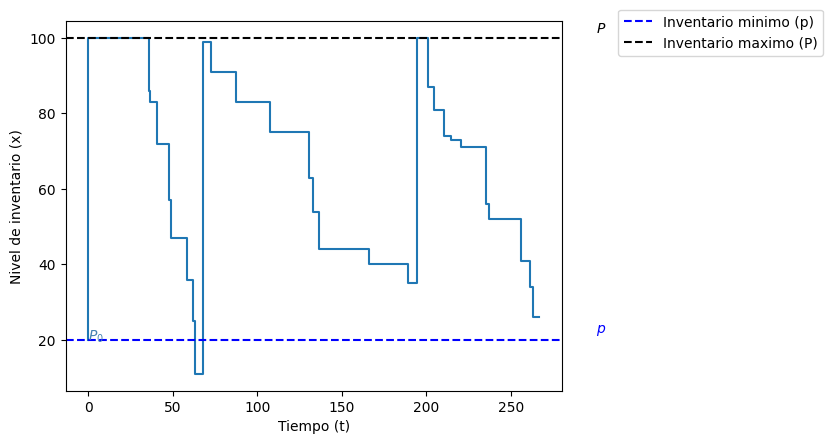

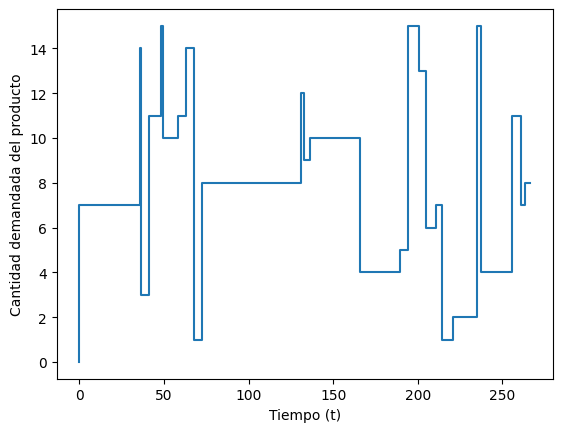

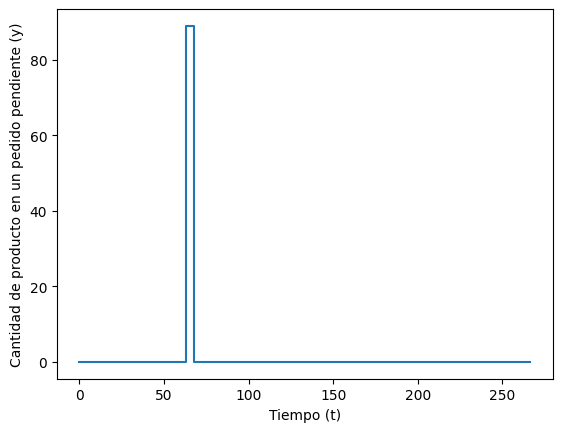

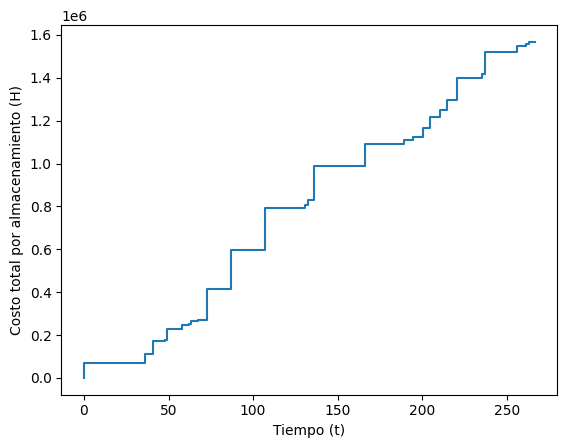

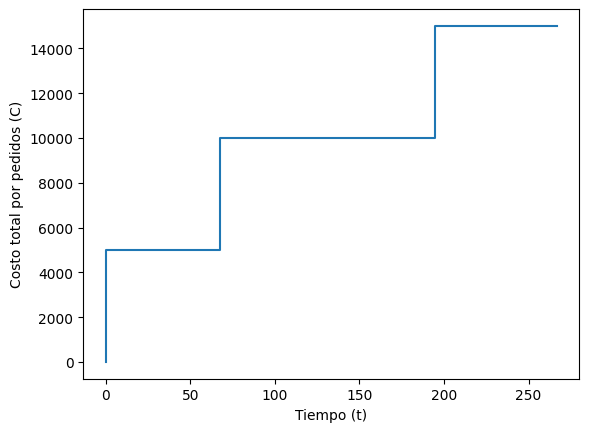

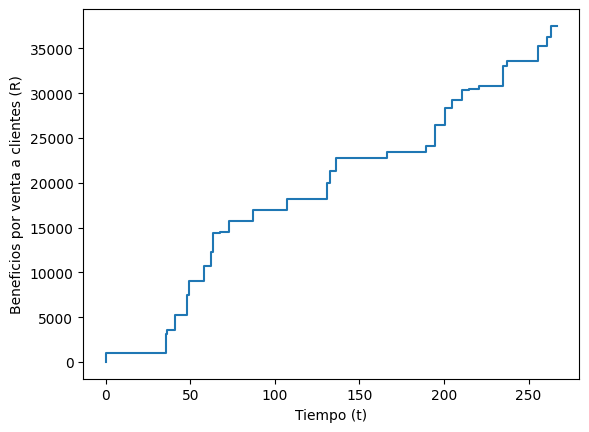

C: 15000
H: 1567474.9500419952
R: 37500
Beneficio: -1544974.95
Porcentaje clientes satisfechos: 100.00
Porcentaje de inventario: 0.00


In [16]:
import scipy.stats as st

def c(y, rangos_valores=None, valor_unitario_default=2500):
    if rangos_valores is not None:
        # Buscar el valor unitario correspondiente al número de unidades solicitadas
        for rango, valor_unitario in rangos_valores.items():
            inicio, fin = rango
            if inicio <= y <= fin:
                return valor_unitario

    # Si no se proporcionan rangos o no se encuentra un rango válido, retornar el valor unitario por defecto
    return valor_unitario_default


M = 999999.0
P0 = 20 # Inventario inicial
P = 100 # Nivel máximo de inventario
p = 20 # producto a pedir si no hay pedidos pendientes
L = 5 # Tiempo que tarda en llegar un pedido
h = 100 # Valor a pagar por una unidad del producto
r = 150 # Valor de venta al público

T = 300
lam = 10

rangos_valores = {
    (1, 100): 5000,
    (101, 200): 4000,
    (201, 1000): 3000,
    (1001, float('inf')): 2000
}

at = [0]
aX = [P0]
aY = [0]
aDemanda  = [0]
aH = [0]
aC = [0]
aR = [0]

def Llegada_cliente(tsuc):
  global H, x, t, h, y, p, P, TSuc, L, T, R, r, NCn, NCp, var_nivel0
  H = H + (tsuc - t) * h * x
  t = tsuc
  demanda = random.randint(1, 15)
  aDemanda.append(demanda)
  if demanda <= x:
    R = R + demanda * r
    x = x - demanda
    NCp = NCp + 1
  else:
    R = R + (x * r)
    x = 0
    NCn = NCn + 1
    var_nivel0 = t

  if x <= p and y == 0:
    y = P - x
    TSuc['tp'] = t + L

  Y = np.random.exponential(lam)
  if t + Y < T:
    TSuc['tC'] = t + Y


def Llegada_pedido(tsuc):
  global H, t, h, x, y, t0, var_nivel0, C
  H = H + (tsuc - t) * h * x
  t = tsuc
  C = C + c(y, rangos_valores)
  x = x + y
  y = 0
  if var_nivel0 > 0:
    t0 = t0 + (t - var_nivel0)
    var_nivel0 = 0


x = P0 # Número de unidades del producto en el inventario
y = 0 # Número de unidades incluidas en un pedido pendiente
NCn = 0 # Número de clientes a los que hemos servido satifactoriamente hasta el instante t
NCp = 0 # Número de clientes a los que no hemos podido satisfacer completamente su demanda hasta el instante t
C = 0 # Coste total por pedidos hasta el instante t
R = 0 # Beneficios por ventas a clientes hasta el instante t
H = 0 # Coste total por almacenamiento hasta el instante t
t = 0 # Tiempo transcurrido de simulación
tsuc = 0
t0 = 0 # Tiempo en el que el nivel del inventario está a cero
var_nivel0 = 0 # Variable en la que se guardarán los instantes en que el nivel del inventario es 0

TSuc = {"tC":M, "tp":M}

Z = np.random.exponential(lam)

if Z > T:
  beneficio = 0 # Beneficio esperado
  p_client_satisf = 0 # Proporción de clientes cuya demanda se satisface completamente
  p_invent_0 = 0 # Porcentaje de tiempo que el nivel del inventario permanece a cero
  exit
else:
  Llegada_cliente(Z)

  while TSuc['tp'] != M or TSuc['tC'] != M:
    if TSuc['tC'] < TSuc['tp']:
      tsuc = TSuc['tC']
      TSuc['tC'] = M
      Llegada_cliente(tsuc)
    if TSuc['tp'] < TSuc['tC']:
      tsuc = TSuc['tp']
      TSuc['tp'] = M
      Llegada_pedido(tsuc)
    at.append(tsuc)
    aX.append(x)
    aY.append(y)
    aH.append(H)
    aC.append(C)
    aR.append(R)
  beneficio = R - C - H
  p_invent_0 = t0/t
  p_client_satisf = NCp/(NCp+NCn)

plt.step(at, aX)
plt.axhline(y=p, color='blue', linestyle='--', label='Inventario minimo (p)')
plt.axhline(y=P, color='black', linestyle='--', label='Inventario maximo (P)')
plt.xlabel('Tiempo (t)')
plt.ylabel('Nivel de inventario (x)')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.text(at[0], aX[0], r'$ P_0 $', c='steelblue')
plt.text(T, p+2, r'$ p $', c='blue')
plt.text(T, P+1.5, r'$ P $', c='black')
plt.show()

plt.step(at, aDemanda)
plt.xlabel('Tiempo (t)')
plt.ylabel('Cantidad demandada del producto')
plt.show()

plt.step(at, aY)
plt.xlabel('Tiempo (t)')
plt.ylabel('Cantidad de producto en un pedido pendiente (y)')
plt.show()

plt.step(at, aH)
plt.xlabel('Tiempo (t)')
plt.ylabel('Costo total por almacenamiento (H)')
plt.show()

plt.step(at, aC)
plt.xlabel('Tiempo (t)')
plt.ylabel('Costo total por pedidos (C)')
plt.show()


plt.step(at, aR)
plt.xlabel('Tiempo (t)')
plt.ylabel('Beneficios por venta a clientes (R)')
plt.show()

print("C:", C)
print("H:", H)
print("R:", R)

print(f"Beneficio: {beneficio:0.2f}")
print(f"Porcentaje clientes satisfechos: {p_client_satisf*100:0.2f}")
print(f"Porcentaje de inventario: {p_invent_0*100:0.2f}")


at = np.array(at)
aX = np.array(aX)
aY = np.array(aY)
aDemanda = np.array(aDemanda)
aH = np.array(aH)
aC = np.array(aC)
aR = np.array(aR)

**5.4**

**BANK RENEGE**

In [17]:
"""
Bank renege example

Covers:

- Resources: Resource
- Condition events

Scenario:
  A counter with a random service time and customers who renege. Based on the
  program bank08.py from TheBank tutorial of SimPy 2. (KGM)

"""
import random

import simpy


RANDOM_SEED = 42
NEW_CUSTOMERS = 5  # Total number of customers
INTERVAL_CUSTOMERS = 10.0  # Generate new customers roughly every x seconds
MIN_PATIENCE = 1  # Min. customer patience
MAX_PATIENCE = 3  # Max. customer patience


def source(env, number, interval, counter):
    """Source generates customers randomly"""
    for i in range(number):
        c = customer(env, 'Customer%02d' % i, counter, time_in_bank=12.0)
        env.process(c)
        t = random.expovariate(1.0 / interval)
        yield env.timeout(t)


def customer(env, name, counter, time_in_bank):
    """Customer arrives, is served and leaves."""
    arrive = env.now
    print('%7.4f %s: Here I am' % (arrive, name))

    with counter.request() as req:
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        # Wait for the counter or abort at the end of our tether
        results = yield req | env.timeout(patience)

        wait = env.now - arrive

        if req in results:
            # We got to the counter
            print('%7.4f %s: Waited %6.3f' % (env.now, name, wait))

            tib = random.expovariate(1.0 / time_in_bank)
            yield env.timeout(tib)
            print('%7.4f %s: Finished' % (env.now, name))

        else:
            # We reneged
            print('%7.4f %s: RENEGED after %6.3f' % (env.now, name, wait))


# Setup and start the simulation
print('Bank renege')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Start processes and run
counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

Bank renege
 0.0000 Customer00: Here I am
 0.0000 Customer00: Waited  0.000
 3.8595 Customer00: Finished
10.2006 Customer01: Here I am
10.2006 Customer01: Waited  0.000
12.7265 Customer02: Here I am
13.9003 Customer02: RENEGED after  1.174
23.7507 Customer01: Finished
34.9993 Customer03: Here I am
34.9993 Customer03: Waited  0.000
37.9599 Customer03: Finished
40.4798 Customer04: Here I am
40.4798 Customer04: Waited  0.000
43.1401 Customer04: Finished


**CARWASH**

In [18]:
"""
Carwash example.

Covers:

- Waiting for other processes
- Resources: Resource

Scenario:
  A carwash has a limited number of washing machines and defines
  a washing processes that takes some (random) time.

  Car processes arrive at the carwash at a random time. If one washing
  machine is available, they start the washing process and wait for it
  to finish. If not, they wait until they an use one.

"""
import random

import simpy


RANDOM_SEED = 42
NUM_MACHINES = 2  # Number of machines in the carwash
WASHTIME = 5      # Minutes it takes to clean a car
T_INTER = 7       # Create a car every ~7 minutes
SIM_TIME = 20     # Simulation time in minutes


class Carwash(object):
    """A carwash has a limited number of machines (``NUM_MACHINES``) to
    clean cars in parallel.

    Cars have to request one of the machines. When they got one, they
    can start the washing processes and wait for it to finish (which
    takes ``washtime`` minutes).

    """
    def __init__(self, env, num_machines, washtime):
        self.env = env
        self.machine = simpy.Resource(env, num_machines)
        self.washtime = washtime

    def wash(self, car):
        """The washing processes. It takes a ``car`` processes and tries
        to clean it."""
        yield self.env.timeout(WASHTIME)
        print("Carwash removed %d%% of %s's dirt." %
              (random.randint(50, 99), car))


def car(env, name, cw):
    """The car process (each car has a ``name``) arrives at the carwash
    (``cw``) and requests a cleaning machine.

    It then starts the washing process, waits for it to finish and
    leaves to never come back ...

    """
    print('%s arrives at the carwash at %.2f.' % (name, env.now))
    with cw.machine.request() as request:
        yield request

        print('%s enters the carwash at %.2f.' % (name, env.now))
        yield env.process(cw.wash(name))

        print('%s leaves the carwash at %.2f.' % (name, env.now))


def setup(env, num_machines, washtime, t_inter):
    """Create a carwash, a number of initial cars and keep creating cars
    approx. every ``t_inter`` minutes."""
    # Create the carwash
    carwash = Carwash(env, num_machines, washtime)

    # Create 4 initial cars
    for i in range(4):
        env.process(car(env, 'Car %d' % i, carwash))

    # Create more cars while the simulation is running
    while True:
        yield env.timeout(random.randint(t_inter - 2, t_inter + 2))
        i += 1
        env.process(car(env, 'Car %d' % i, carwash))


# Setup and start the simulation
print('Carwash')
random.seed(RANDOM_SEED)  # This helps reproducing the results

# Create an environment and start the setup process
env = simpy.Environment()
env.process(setup(env, NUM_MACHINES, WASHTIME, T_INTER))

# Execute!
env.run(until=SIM_TIME)

Carwash
Car 0 arrives at the carwash at 0.00.
Car 1 arrives at the carwash at 0.00.
Car 2 arrives at the carwash at 0.00.
Car 3 arrives at the carwash at 0.00.
Car 0 enters the carwash at 0.00.
Car 1 enters the carwash at 0.00.
Car 4 arrives at the carwash at 5.00.
Carwash removed 97% of Car 0's dirt.
Carwash removed 67% of Car 1's dirt.
Car 0 leaves the carwash at 5.00.
Car 1 leaves the carwash at 5.00.
Car 2 enters the carwash at 5.00.
Car 3 enters the carwash at 5.00.
Car 5 arrives at the carwash at 10.00.
Carwash removed 64% of Car 2's dirt.
Carwash removed 58% of Car 3's dirt.
Car 2 leaves the carwash at 10.00.
Car 3 leaves the carwash at 10.00.
Car 4 enters the carwash at 10.00.
Car 5 enters the carwash at 10.00.
Carwash removed 97% of Car 4's dirt.
Carwash removed 56% of Car 5's dirt.
Car 4 leaves the carwash at 15.00.
Car 5 leaves the carwash at 15.00.
Car 6 arrives at the carwash at 16.00.
Car 6 enters the carwash at 16.00.


**MACHINE SHOP**

In [19]:
"""
Machine shop example

Covers:

- Interrupts
- Resources: PreemptiveResource

Scenario:
  A workshop has *n* identical machines. A stream of jobs (enough to
  keep the machines busy) arrives. Each machine breaks down
  periodically. Repairs are carried out by one repairman. The repairman
  has other, less important tasks to perform, too. Broken machines
  preempt theses tasks. The repairman continues them when he is done
  with the machine repair. The workshop works continuously.

"""
import random

import simpy


RANDOM_SEED = 42
PT_MEAN = 10.0         # Avg. processing time in minutes
PT_SIGMA = 2.0         # Sigma of processing time
MTTF = 300.0           # Mean time to failure in minutes
BREAK_MEAN = 1 / MTTF  # Param. for expovariate distribution
REPAIR_TIME = 30.0     # Time it takes to repair a machine in minutes
JOB_DURATION = 30.0    # Duration of other jobs in minutes
NUM_MACHINES = 10      # Number of machines in the machine shop
WEEKS = 4              # Simulation time in weeks
SIM_TIME = WEEKS * 7 * 24 * 60  # Simulation time in minutes


def time_per_part():
    """Return actual processing time for a concrete part."""
    return random.normalvariate(PT_MEAN, PT_SIGMA)


def time_to_failure():
    """Return time until next failure for a machine."""
    return random.expovariate(BREAK_MEAN)


class Machine(object):
    """A machine produces parts and my get broken every now and then.

    If it breaks, it requests a *repairman* and continues the production
    after the it is repaired.

    A machine has a *name* and a numberof *parts_made* thus far.

    """
    def __init__(self, env, name, repairman):
        self.env = env
        self.name = name
        self.parts_made = 0
        self.broken = False

        # Start "working" and "break_machine" processes for this machine.
        self.process = env.process(self.working(repairman))
        env.process(self.break_machine())

    def working(self, repairman):
        """Produce parts as long as the simulation runs.

        While making a part, the machine may break multiple times.
        Request a repairman when this happens.

        """
        while True:
            # Start making a new part
            done_in = time_per_part()
            while done_in:
                try:
                    # Working on the part
                    start = self.env.now
                    yield self.env.timeout(done_in)
                    done_in = 0  # Set to 0 to exit while loop.

                except simpy.Interrupt:
                    self.broken = True
                    done_in -= self.env.now - start  # How much time left?

                    # Request a repairman. This will preempt its "other_job".
                    with repairman.request(priority=1) as req:
                        yield req
                        yield self.env.timeout(REPAIR_TIME)

                    self.broken = False

            # Part is done.
            self.parts_made += 1

    def break_machine(self):
        """Break the machine every now and then."""
        while True:
            yield self.env.timeout(time_to_failure())
            if not self.broken:
                # Only break the machine if it is currently working.
                self.process.interrupt()


def other_jobs(env, repairman):
    """The repairman's other (unimportant) job."""
    while True:
        # Start a new job
        done_in = JOB_DURATION
        while done_in:
            # Retry the job until it is done.
            # It's priority is lower than that of machine repairs.
            with repairman.request(priority=2) as req:
                yield req
                try:
                    start = env.now
                    yield env.timeout(done_in)
                    done_in = 0
                except simpy.Interrupt:
                    done_in -= env.now - start


# Setup and start the simulation
print('Machine shop')
random.seed(RANDOM_SEED)  # This helps reproducing the results

# Create an environment and start the setup process
env = simpy.Environment()
repairman = simpy.PreemptiveResource(env, capacity=1)
machines = [Machine(env, 'Machine %d' % i, repairman)
            for i in range(NUM_MACHINES)]
env.process(other_jobs(env, repairman))

# Execute!
env.run(until=SIM_TIME)

# Analyis/results
print('Machine shop results after %s weeks' % WEEKS)
for machine in machines:
    print('%s made %d parts.' % (machine.name, machine.parts_made))

Machine shop
Machine shop results after 4 weeks
Machine 0 made 3251 parts.
Machine 1 made 3273 parts.
Machine 2 made 3242 parts.
Machine 3 made 3343 parts.
Machine 4 made 3387 parts.
Machine 5 made 3244 parts.
Machine 6 made 3269 parts.
Machine 7 made 3185 parts.
Machine 8 made 3302 parts.
Machine 9 made 3279 parts.


**MOVIE RENEGE**

In [20]:
"""
Movie renege example

Covers:

- Resources: Resource
- Condition events
- Shared events

Scenario:
  A movie theatre has one ticket counter selling tickets for three
  movies (next show only). When a movie is sold out, all people waiting
  to buy tickets for that movie renege (leave queue).

"""
import collections
import random

import simpy


RANDOM_SEED = 42
TICKETS = 50  # Number of tickets per movie
SIM_TIME = 120  # Simulate until


def moviegoer(env, movie, num_tickets, theater):
    """A moviegoer tries to by a number of tickets (*num_tickets*) for
    a certain *movie* in a *theater*.

    If the movie becomes sold out, she leaves the theater. If she gets
    to the counter, she tries to buy a number of tickets. If not enough
    tickets are left, she argues with the teller and leaves.

    If at most one ticket is left after the moviegoer bought her
    tickets, the *sold out* event for this movie is triggered causing
    all remaining moviegoers to leave.

    """
    with theater.counter.request() as my_turn:
        # Wait until its our turn or until the movie is sold out
        result = yield my_turn | theater.sold_out[movie]

        # Check if it's our turn or if movie is sold out
        if my_turn not in result:
            theater.num_renegers[movie] += 1
            return

        # Check if enough tickets left.
        if theater.available[movie] < num_tickets:
            # Moviegoer leaves after some discussion
            yield env.timeout(0.5)
            return

        # Buy tickets
        theater.available[movie] -= num_tickets
        if theater.available[movie] < 2:
            # Trigger the "sold out" event for the movie
            theater.sold_out[movie].succeed()
            theater.when_sold_out[movie] = env.now
            theater.available[movie] = 0
        yield env.timeout(1)


def customer_arrivals(env, theater):
    """Create new *moviegoers* until the sim time reaches 120."""
    while True:
        yield env.timeout(random.expovariate(1 / 0.5))

        movie = random.choice(theater.movies)
        num_tickets = random.randint(1, 6)
        if theater.available[movie]:
            env.process(moviegoer(env, movie, num_tickets, theater))


Theater = collections.namedtuple('Theater', 'counter, movies, available, '
                                            'sold_out, when_sold_out, '
                                            'num_renegers')


# Setup and start the simulation
print('Movie renege')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# Create movie theater
counter = simpy.Resource(env, capacity=1)
movies = ['Python Unchained', 'Kill Process', 'Pulp Implementation']
available = {movie: TICKETS for movie in movies}
sold_out = {movie: env.event() for movie in movies}
when_sold_out = {movie: None for movie in movies}
num_renegers = {movie: 0 for movie in movies}
theater = Theater(counter, movies, available, sold_out, when_sold_out,
                  num_renegers)

# Start process and run
env.process(customer_arrivals(env, theater))
env.run(until=SIM_TIME)

# Analysis/results
for movie in movies:
    if theater.sold_out[movie]:
        print('Movie "%s" sold out %.1f minutes after ticket counter '
              'opening.' % (movie, theater.when_sold_out[movie]))
        print('  Number of people leaving queue when film sold out: %s' %
              theater.num_renegers[movie])

Movie renege
Movie "Python Unchained" sold out 38.0 minutes after ticket counter opening.
  Number of people leaving queue when film sold out: 16
Movie "Kill Process" sold out 43.0 minutes after ticket counter opening.
  Number of people leaving queue when film sold out: 5
Movie "Pulp Implementation" sold out 28.0 minutes after ticket counter opening.
  Number of people leaving queue when film sold out: 5


**GAS STATION REFUELING**

In [21]:
"""
Gas Station Refueling example

Covers:

- Resources: Resource
- Resources: Container
- Waiting for other processes

Scenario:
  A gas station has a limited number of gas pumps that share a common
  fuel reservoir. Cars randomly arrive at the gas station, request one
  of the fuel pumps and start refueling from that reservoir.

  A gas station control process observes the gas station's fuel level
  and calls a tank truck for refueling if the station's level drops
  below a threshold.

"""
import itertools
import random

import simpy


RANDOM_SEED = 42
GAS_STATION_SIZE = 200     # liters
THRESHOLD = 10             # Threshold for calling the tank truck (in %)
FUEL_TANK_SIZE = 50        # liters
FUEL_TANK_LEVEL = [5, 25]  # Min/max levels of fuel tanks (in liters)
REFUELING_SPEED = 2        # liters / second
TANK_TRUCK_TIME = 300      # Seconds it takes the tank truck to arrive
T_INTER = [30, 300]        # Create a car every [min, max] seconds
SIM_TIME = 1000            # Simulation time in seconds


def car(name, env, gas_station, fuel_pump):
    """A car arrives at the gas station for refueling.

    It requests one of the gas station's fuel pumps and tries to get the
    desired amount of gas from it. If the stations reservoir is
    depleted, the car has to wait for the tank truck to arrive.

    """
    fuel_tank_level = random.randint(*FUEL_TANK_LEVEL)
    print('%s arriving at gas station at %.1f' % (name, env.now))
    with gas_station.request() as req:
        start = env.now
        # Request one of the gas pumps
        yield req

        # Get the required amount of fuel
        liters_required = FUEL_TANK_SIZE - fuel_tank_level
        yield fuel_pump.get(liters_required)

        # The "actual" refueling process takes some time
        yield env.timeout(liters_required / REFUELING_SPEED)

        print('%s finished refueling in %.1f seconds.' % (name,
                                                          env.now - start))


def gas_station_control(env, fuel_pump):
    """Periodically check the level of the *fuel_pump* and call the tank
    truck if the level falls below a threshold."""
    while True:
        if fuel_pump.level / fuel_pump.capacity * 100 < THRESHOLD:
            # We need to call the tank truck now!
            print('Calling tank truck at %d' % env.now)
            # Wait for the tank truck to arrive and refuel the station
            yield env.process(tank_truck(env, fuel_pump))

        yield env.timeout(10)  # Check every 10 seconds


def tank_truck(env, fuel_pump):
    """Arrives at the gas station after a certain delay and refuels it."""
    yield env.timeout(TANK_TRUCK_TIME)
    print('Tank truck arriving at time %d' % env.now)
    ammount = fuel_pump.capacity - fuel_pump.level
    print('Tank truck refuelling %.1f liters.' % ammount)
    yield fuel_pump.put(ammount)


def car_generator(env, gas_station, fuel_pump):
    """Generate new cars that arrive at the gas station."""
    for i in itertools.count():
        yield env.timeout(random.randint(*T_INTER))
        env.process(car('Car %d' % i, env, gas_station, fuel_pump))


# Setup and start the simulation
print('Gas Station refuelling')
random.seed(RANDOM_SEED)

# Create environment and start processes
env = simpy.Environment()
gas_station = simpy.Resource(env, 2)
fuel_pump = simpy.Container(env, GAS_STATION_SIZE, init=GAS_STATION_SIZE)
env.process(gas_station_control(env, fuel_pump))
env.process(car_generator(env, gas_station, fuel_pump))

# Execute!
env.run(until=SIM_TIME)

Gas Station refuelling
Car 0 arriving at gas station at 87.0
Car 0 finished refueling in 18.5 seconds.
Car 1 arriving at gas station at 129.0
Car 1 finished refueling in 19.0 seconds.
Car 2 arriving at gas station at 284.0
Car 2 finished refueling in 21.0 seconds.
Car 3 arriving at gas station at 385.0
Car 3 finished refueling in 13.5 seconds.
Car 4 arriving at gas station at 459.0
Calling tank truck at 460
Car 4 finished refueling in 22.0 seconds.
Car 5 arriving at gas station at 705.0
Car 6 arriving at gas station at 750.0
Tank truck arriving at time 760
Tank truck refuelling 188.0 liters.
Car 6 finished refueling in 29.0 seconds.
Car 5 finished refueling in 76.5 seconds.
Car 7 arriving at gas station at 891.0
Car 7 finished refueling in 13.0 seconds.


**PROCESS COMMUNICATION**

In [22]:
"""
Process communication example

Covers:

- Resources: Store

Scenario:
  This example shows how to interconnect simulation model elements
  together using :class:`~simpy.resources.store.Store` for one-to-one,
  and many-to-one asynchronous processes. For one-to-many a simple
  BroadCastPipe class is constructed from Store.

When Useful:
  When a consumer process does not always wait on a generating process
  and these processes run asynchronously. This example shows how to
  create a buffer and also tell is the consumer process was late
  yielding to the event from a generating process.

  This is also useful when some information needs to be broadcast to
  many receiving processes

  Finally, using pipes can simplify how processes are interconnected to
  each other in a simulation model.

Example By:
  Keith Smith

"""
import random
import simpy

RANDOM_SEED = 42
SIM_TIME = 100

class BroadcastPipe(object):
    """A Broadcast pipe that allows one process to send messages to many.

    This construct is useful when message consumers are running at
    different rates than message generators and provides an event
    buffering to the consuming processes.

    The parameters are used to create a new
    :class:`~simpy.resources.store.Store` instance each time
    :meth:`get_output_conn()` is called.

    """
    def __init__(self, env, capacity=simpy.core.Infinity):
        self.env = env
        self.capacity = capacity
        self.pipes = []

    def put(self, value):
        """Broadcast a *value* to all receivers."""
        if not self.pipes:
            raise RuntimeError('There are no output pipes.')
        events = [store.put(value) for store in self.pipes]
        return self.env.all_of(events)  # Condition event for all "events"

    def get_output_conn(self):
        """Get a new output connection for this broadcast pipe.

        The return value is a :class:`~simpy.resources.store.Store`.

        """
        pipe = simpy.Store(self.env, capacity=self.capacity)
        self.pipes.append(pipe)
        return pipe


def message_generator(name, env, out_pipe):
    """A process which randomly generates messages."""
    while True:
        # wait for next transmission
        yield env.timeout(random.randint(6, 10))

        # messages are time stamped to later check if the consumer was
        # late getting them.  Note, using event.triggered to do this may
        # result in failure due to FIFO nature of simulation yields.
        # (i.e. if at the same env.now, message_generator puts a message
        # in the pipe first and then message_consumer gets from pipe,
        # the event.triggered will be True in the other order it will be
        # False
        msg = (env.now, '%s says hello at %d' % (name, env.now))
        out_pipe.put(msg)


def message_consumer(name, env, in_pipe):
    """A process which consumes messages."""
    while True:
        # Get event for message pipe
        msg = yield in_pipe.get()

        if msg[0] < env.now:
            # if message was already put into pipe, then
            # message_consumer was late getting to it. Depending on what
            # is being modeled this, may, or may not have some
            # significance
            print('LATE Getting Message: at time %d: %s received message: %s' %
                  (env.now, name, msg[1]))

        else:
            # message_consumer is synchronized with message_generator
            print('at time %d: %s received message: %s.' %
                  (env.now, name, msg[1]))

        # Process does some other work, which may result in missing messages
        yield env.timeout(random.randint(4, 8))


# Setup and start the simulation
print('Process communication')
random.seed(RANDOM_SEED)
env = simpy.Environment()

# For one-to-one or many-to-one type pipes, use Store
pipe = simpy.Store(env)
env.process(message_generator('Generator A', env, pipe))
env.process(message_consumer('Consumer A', env, pipe))

print('\nOne-to-one pipe communication\n')
env.run(until=SIM_TIME)

# For one-to many use BroadcastPipe
# (Note: could also be used for one-to-one,many-to-one or many-to-many)
env = simpy.Environment()
bc_pipe = BroadcastPipe(env)

env.process(message_generator('Generator A', env, bc_pipe))
env.process(message_consumer('Consumer A', env, bc_pipe.get_output_conn()))
env.process(message_consumer('Consumer B', env, bc_pipe.get_output_conn()))

print('\nOne-to-many pipe communication\n')
env.run(until=SIM_TIME)

Process communication

One-to-one pipe communication

at time 6: Consumer A received message: Generator A says hello at 6.
at time 12: Consumer A received message: Generator A says hello at 12.
at time 19: Consumer A received message: Generator A says hello at 19.
at time 26: Consumer A received message: Generator A says hello at 26.
at time 36: Consumer A received message: Generator A says hello at 36.
at time 46: Consumer A received message: Generator A says hello at 46.
at time 52: Consumer A received message: Generator A says hello at 52.
at time 58: Consumer A received message: Generator A says hello at 58.
LATE Getting Message: at time 66: Consumer A received message: Generator A says hello at 65
at time 75: Consumer A received message: Generator A says hello at 75.
at time 85: Consumer A received message: Generator A says hello at 85.
at time 95: Consumer A received message: Generator A says hello at 95.

One-to-many pipe communication

at time 10: Consumer A received message: G

**EVENT LATENCY**

In [23]:
"""
Event Latency example

Covers:

- Resources: Store

Scenario:
  This example shows how to separate the time delay of events between
  processes from the processes themselves.

When Useful:
  When modeling physical things such as cables, RF propagation, etc.  it
  better encapsulation to keep this propagation mechanism outside of the
  sending and receiving processes.

  Can also be used to interconnect processes sending messages

Example by:
  Keith Smith

"""
import simpy

SIM_DURATION = 100

class Cable(object):
    """This class represents the propagation through a cable."""
    def __init__(self, env, delay):
        self.env = env
        self.delay = delay
        self.store = simpy.Store(env)

    def latency(self, value):
        yield self.env.timeout(self.delay)
        self.store.put(value)

    def put(self, value):
        self.env.process(self.latency(value))

    def get(self):
        return self.store.get()


def sender(env, cable):
    """A process which randomly generates messages."""
    while True:
        # wait for next transmission
        yield env.timeout(5)
        cable.put('Sender sent this at %d' % env.now)


def receiver(env, cable):
    """A process which consumes messages."""
    while True:
        # Get event for message pipe
        msg = yield cable.get()
        print('Received this at %d while %s' % (env.now, msg))


# Setup and start the simulation
print('Event Latency')
env = simpy.Environment()

cable = Cable(env, 10)
env.process(sender(env, cable))
env.process(receiver(env, cable))

env.run(until=SIM_DURATION)

Event Latency
Received this at 15 while Sender sent this at 5
Received this at 20 while Sender sent this at 10
Received this at 25 while Sender sent this at 15
Received this at 30 while Sender sent this at 20
Received this at 35 while Sender sent this at 25
Received this at 40 while Sender sent this at 30
Received this at 45 while Sender sent this at 35
Received this at 50 while Sender sent this at 40
Received this at 55 while Sender sent this at 45
Received this at 60 while Sender sent this at 50
Received this at 65 while Sender sent this at 55
Received this at 70 while Sender sent this at 60
Received this at 75 while Sender sent this at 65
Received this at 80 while Sender sent this at 70
Received this at 85 while Sender sent this at 75
Received this at 90 while Sender sent this at 80
Received this at 95 while Sender sent this at 85


**5.5**

**BANK OFFICE MODEL**
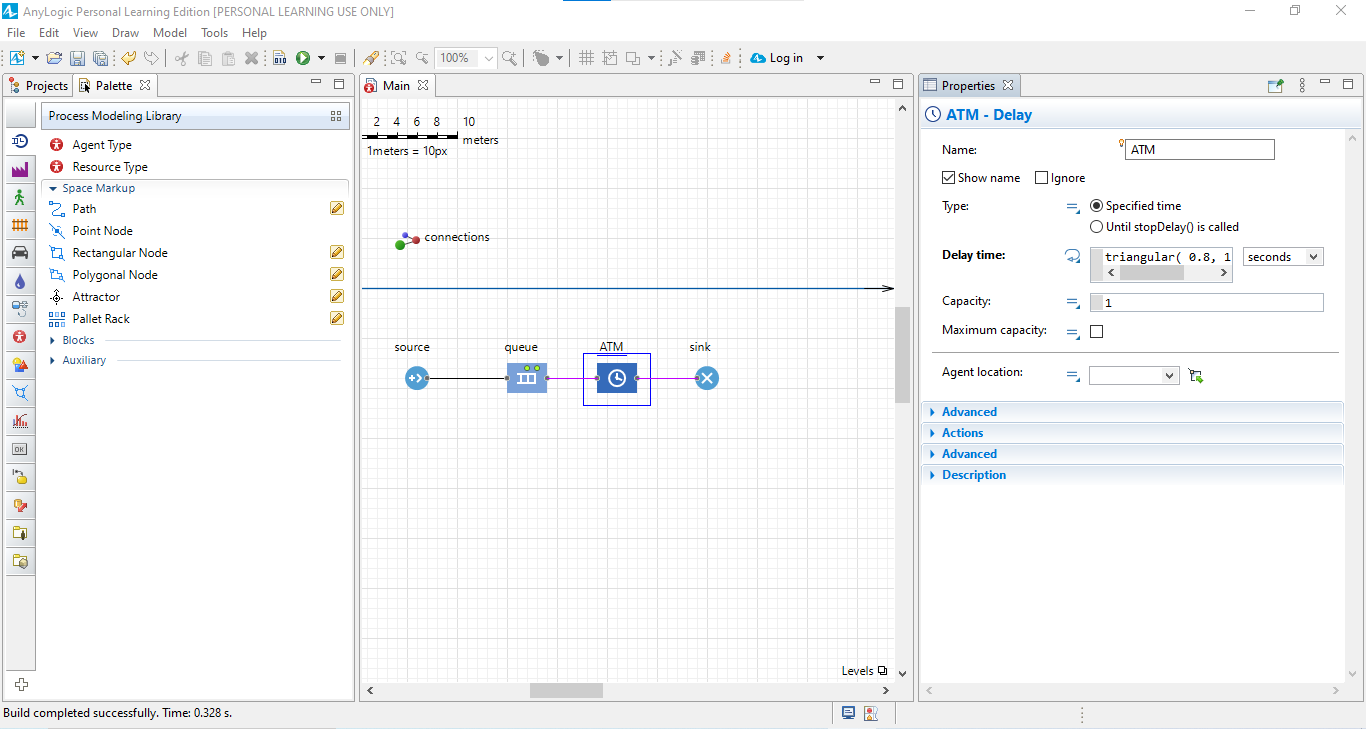


**SIMULACION**

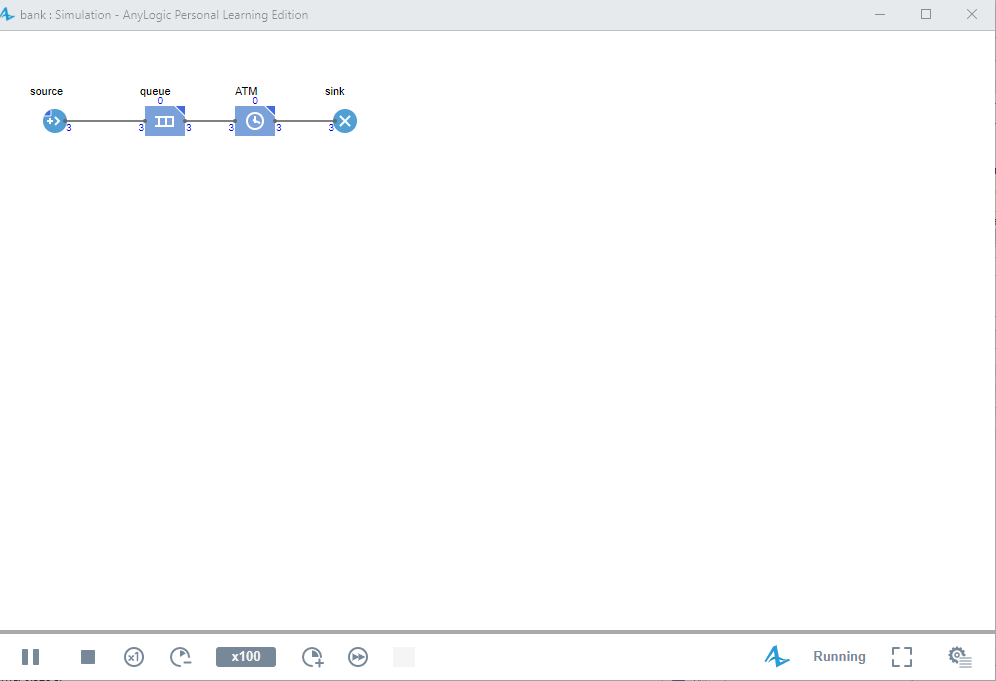

**Subway Entrance hall**


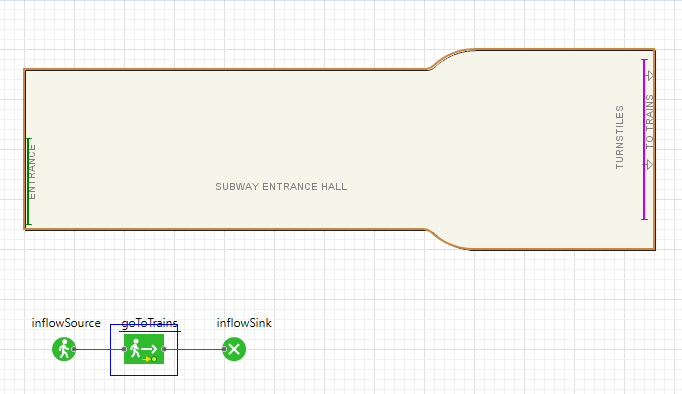

**Simulacion**
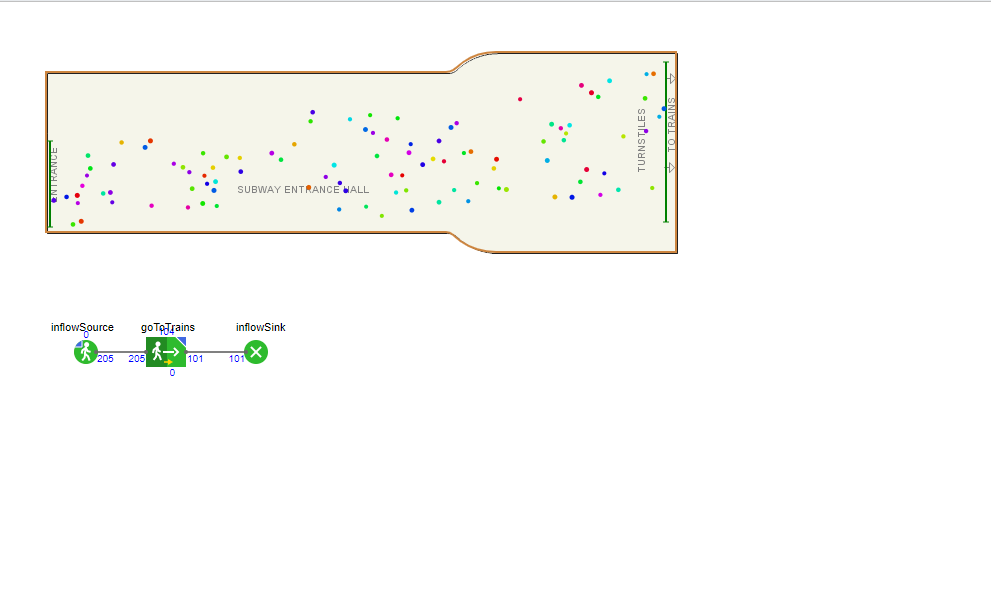


**INTERSECTION**

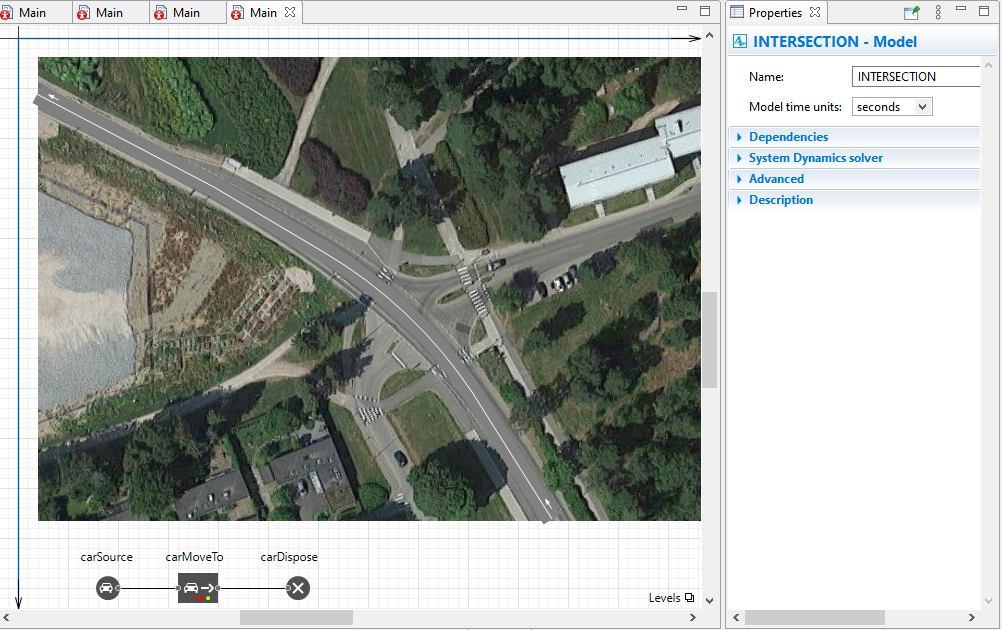


**SIMULATION**

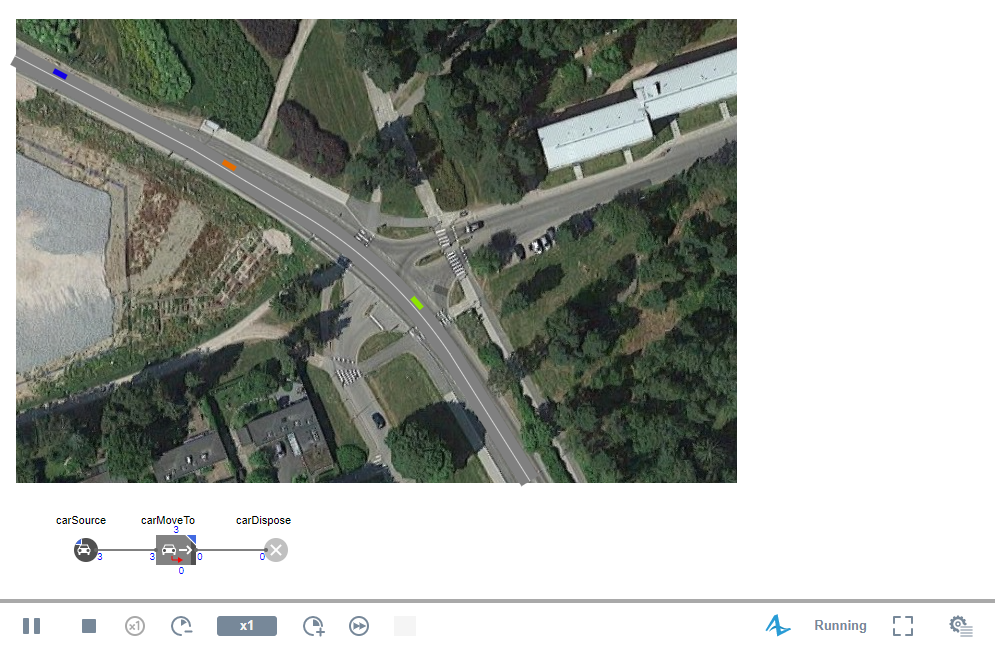

**JOB SHOP**

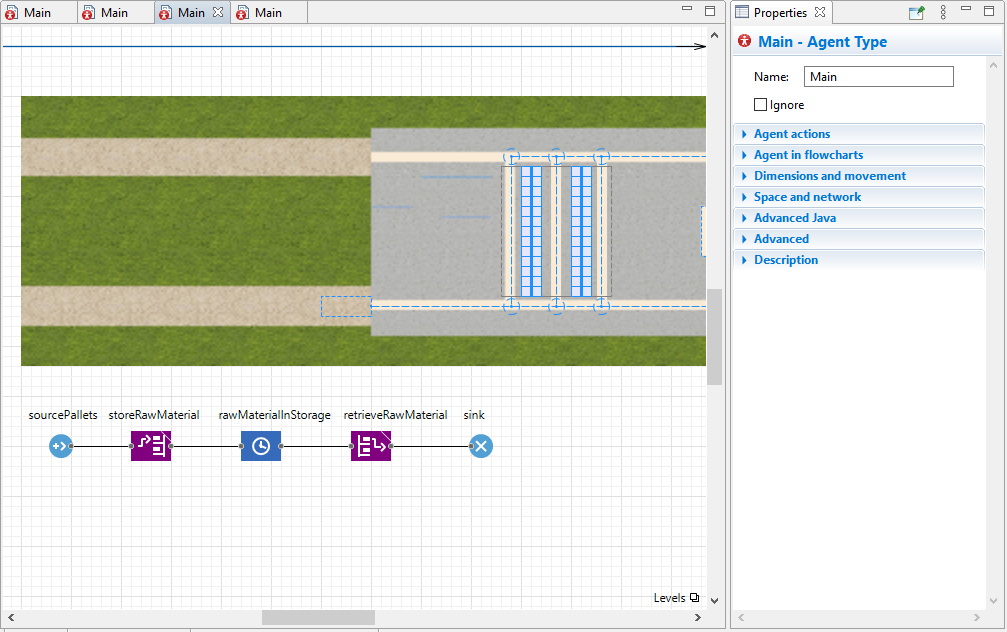

**SIMULATION**

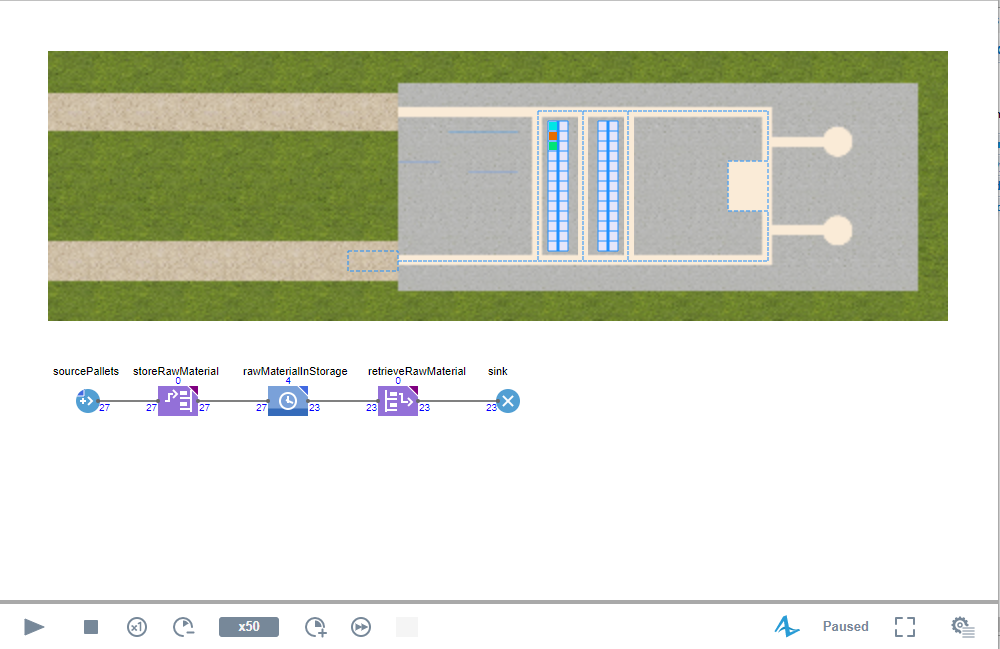

**LEAD ACID BATTERY PRODUCTION**

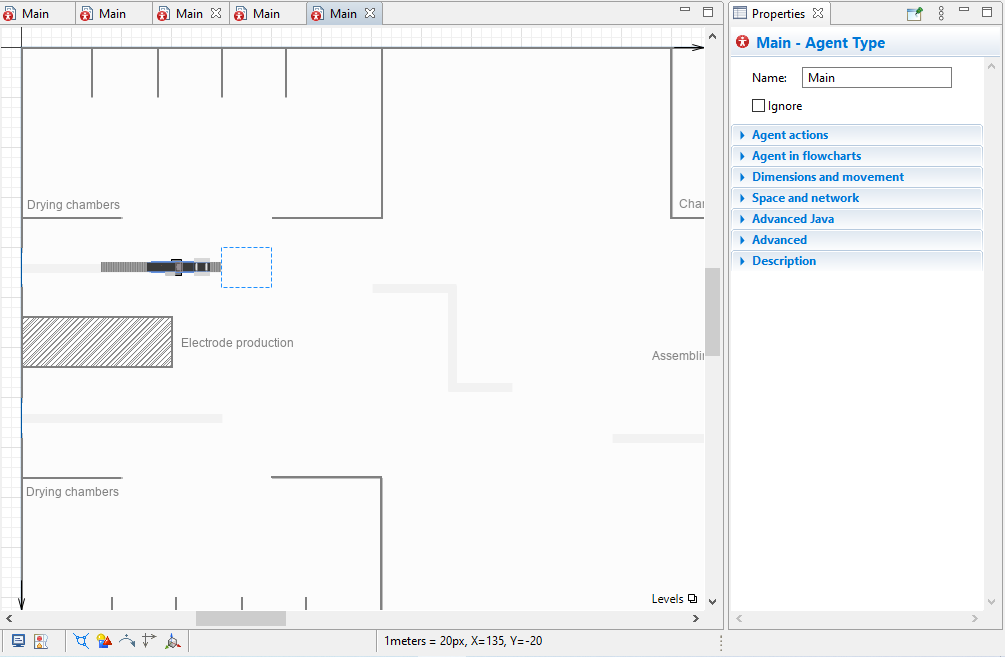


**SIMULATION**

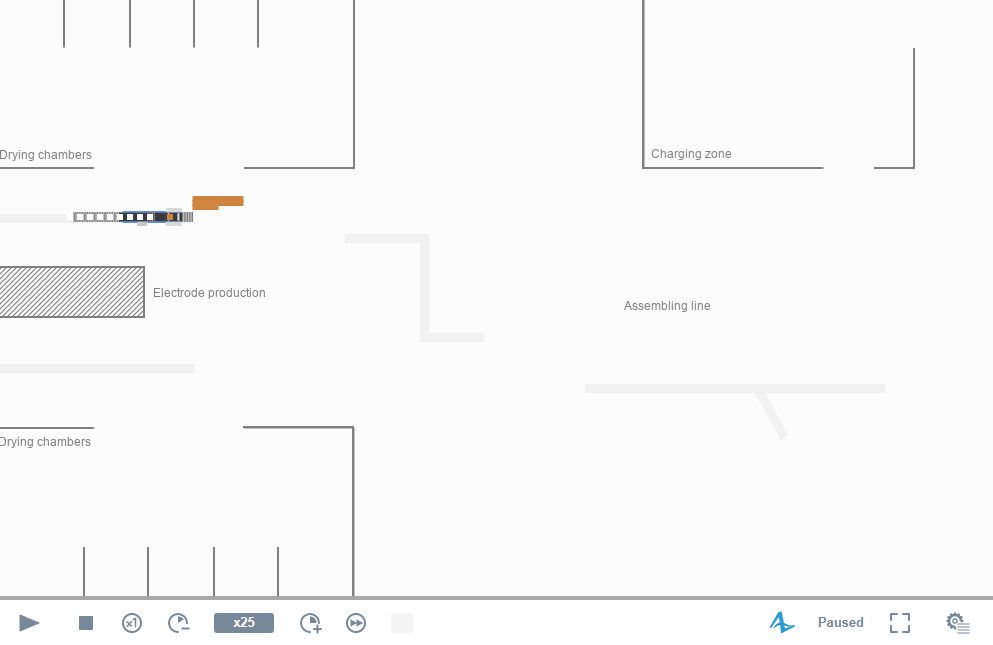

